# Evaluate performace of `kissim` vs. profiling datasets

Summarize ligand-kinase pair performances based on multiple profiling datasets:

- Profiling datasets: Karaman and Davis
- `kissim` datasets: Different feature weighting schemes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import logging
import math
import itertools

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from src import data
from src.paths import PATH_RESULTS
from src.evaluation.ligand_vs_kinase_evaluator import LigandVsKinaseEvaluator

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = PATH_RESULTS / "dfg_in"

## Define parameters

In [5]:
KINASE_DISTANCES_METHOD = "kissim"
KINASE_ACTIVITY_CUTOFF = 100
KINASE_ACTIVITY_MAX = True
MIN_N_SHARED_KINASES = 10
MIN_N_SHARED_ACTIVE_KINASES = 3

In [6]:
suffixes = ["15", "100", "010", "001", "110", "011", "101", "111"]
ligand_profiling_methods = ["karaman-davis", "karaman", "davis"]

## Generate ROC/AUC data

### Ligand profiling method: karaman-davis

#### Kinase-kinase dataset: 15

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

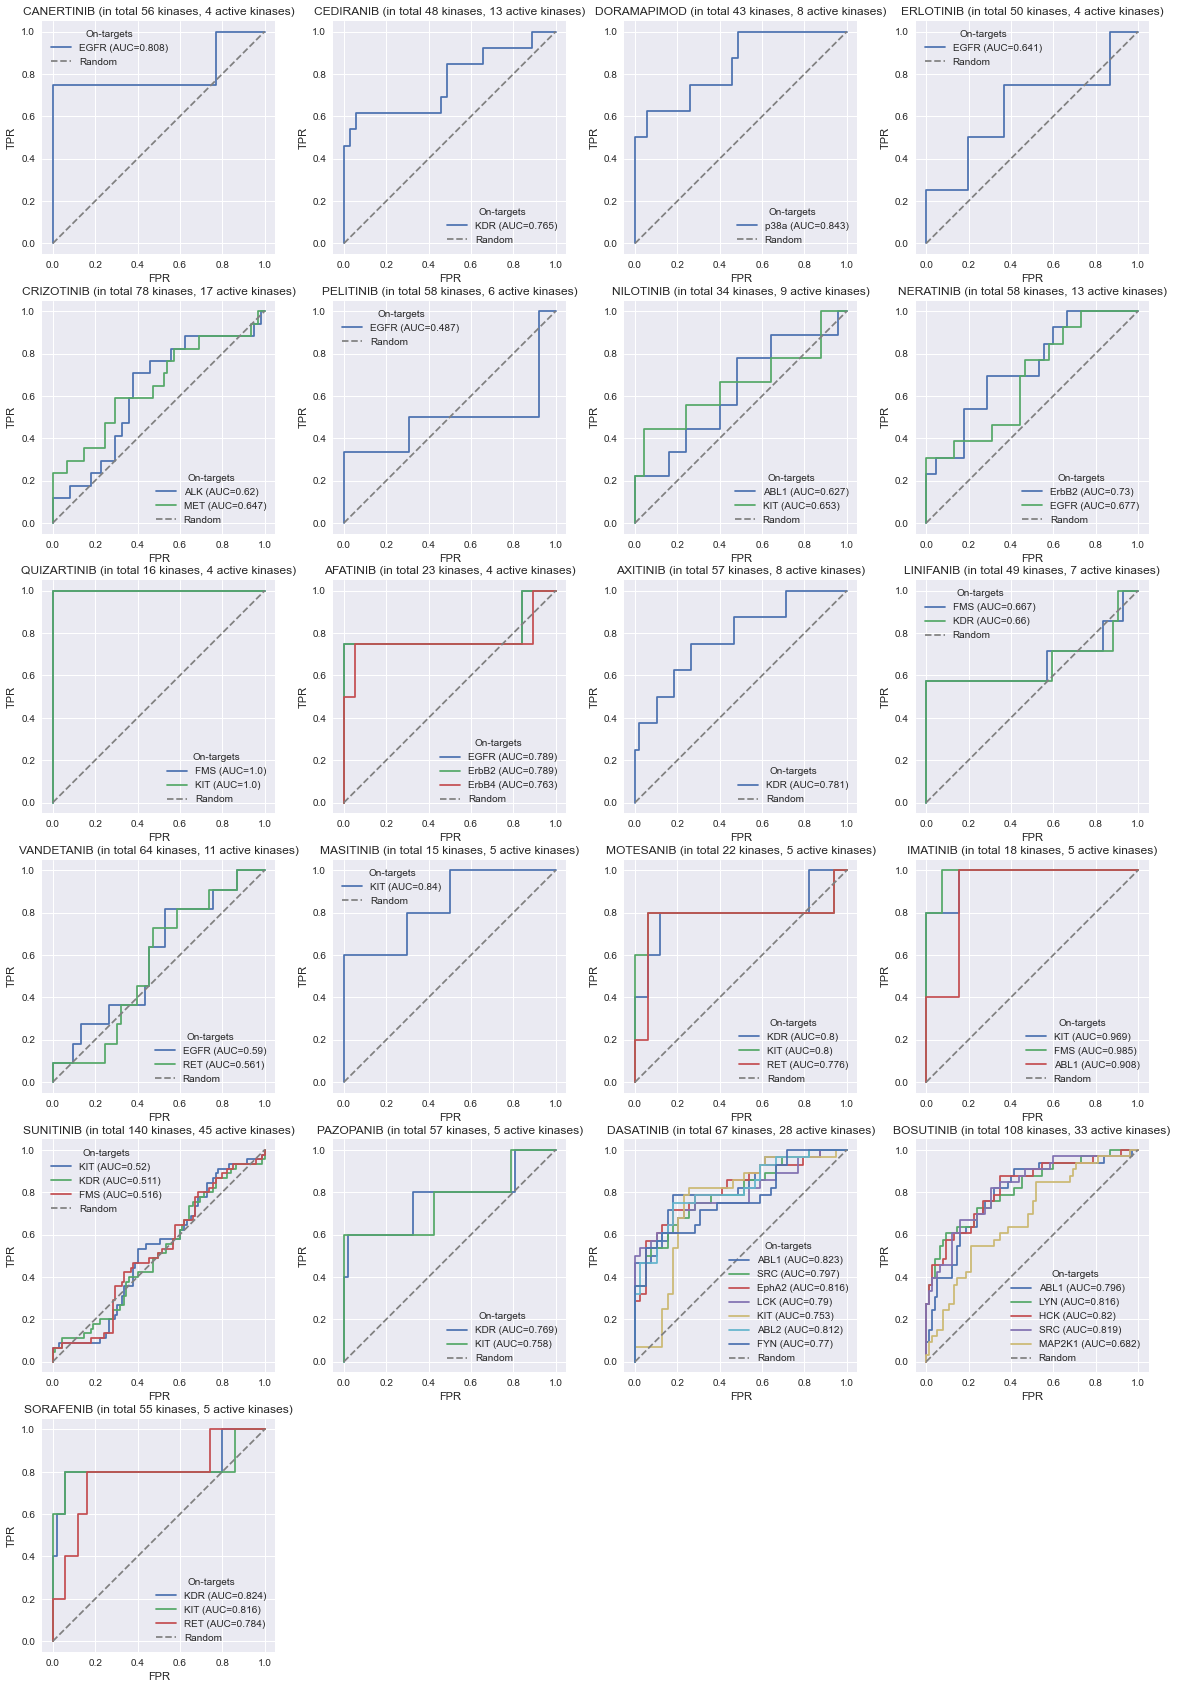

#### Kinase-kinase dataset: 100

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

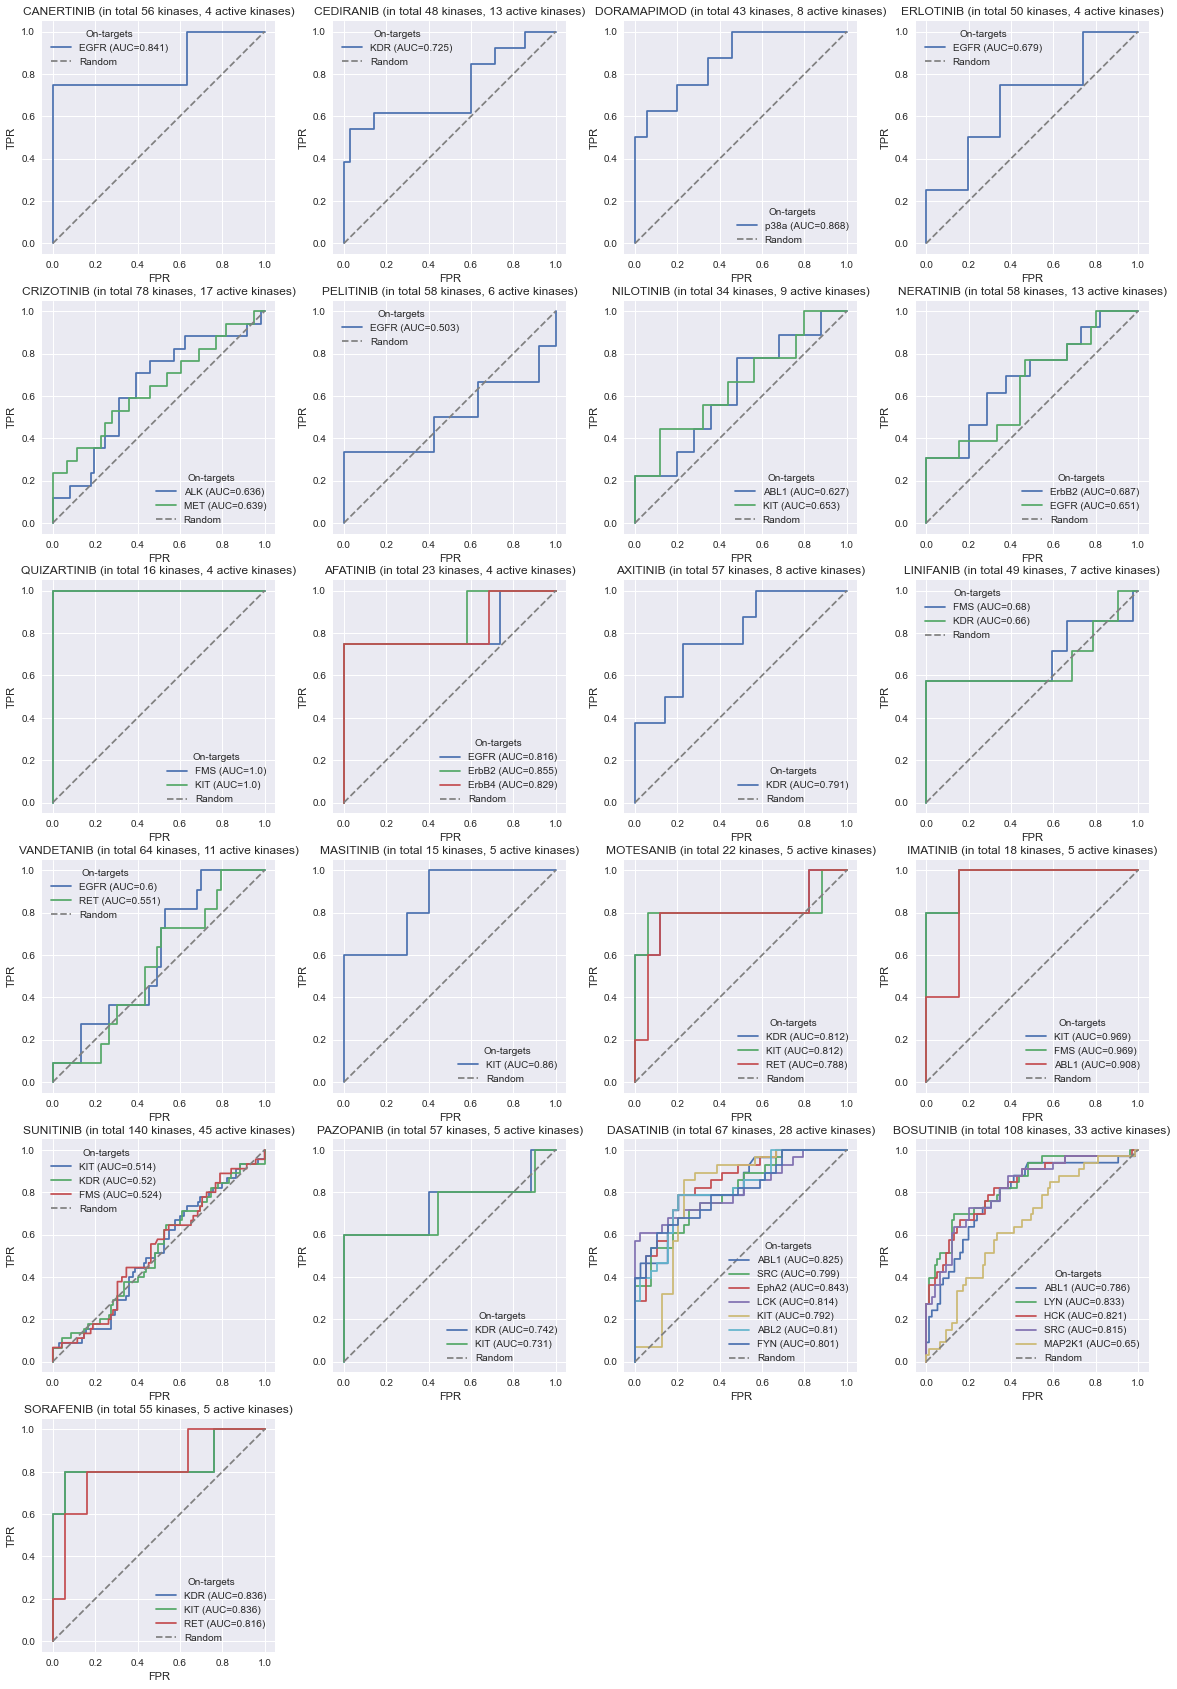

#### Kinase-kinase dataset: 010

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

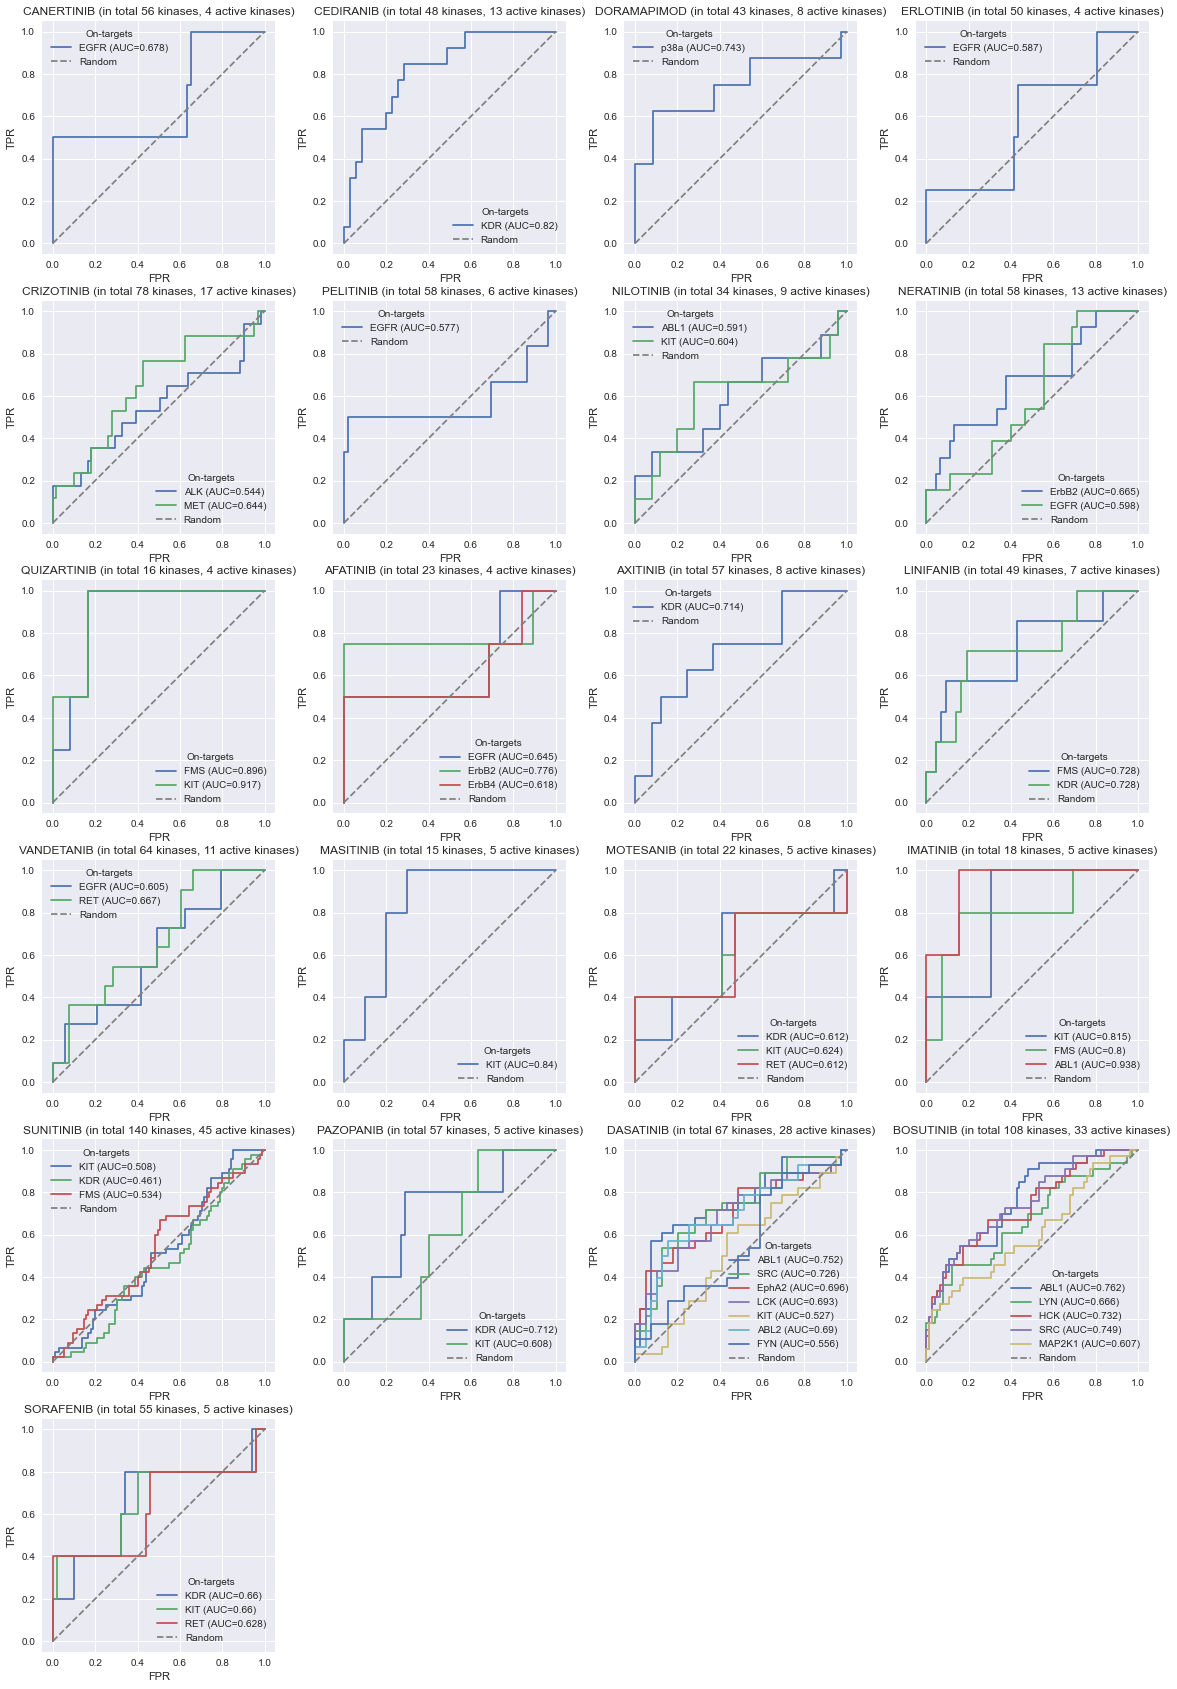

#### Kinase-kinase dataset: 001

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

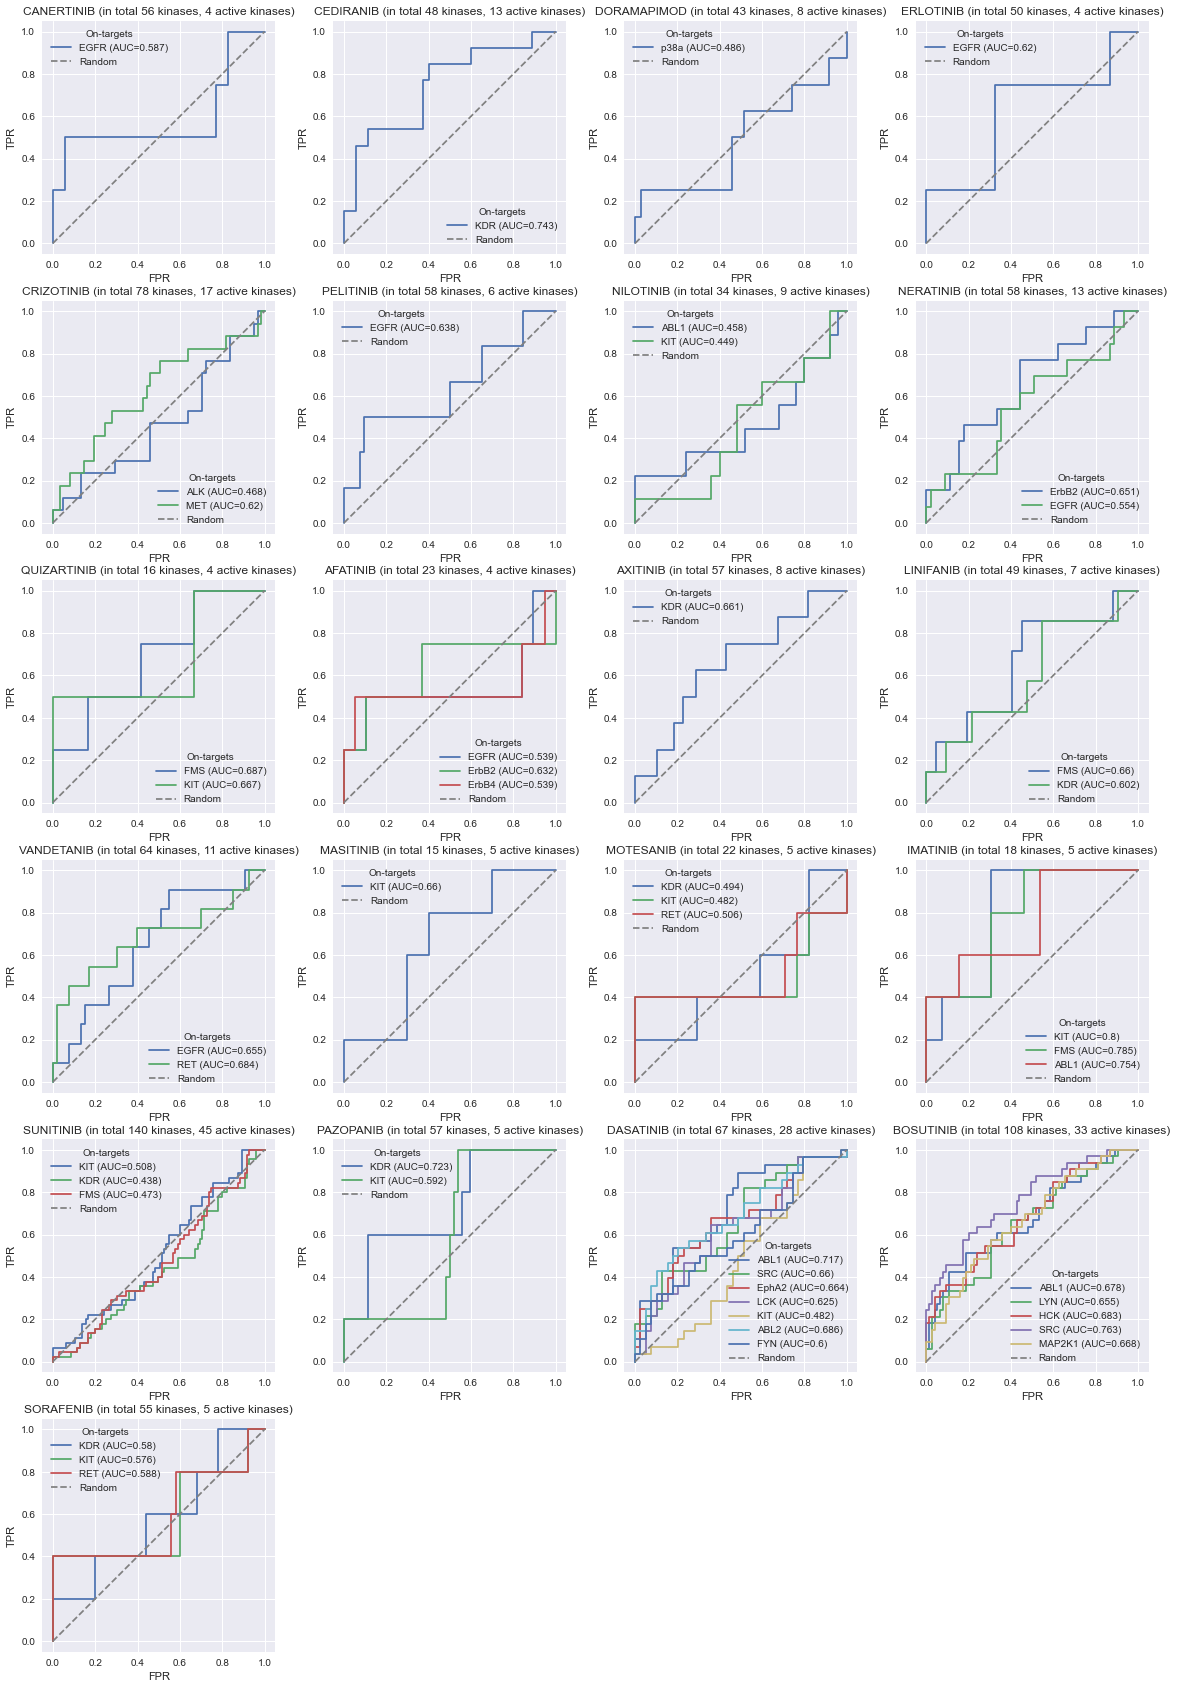

#### Kinase-kinase dataset: 110

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

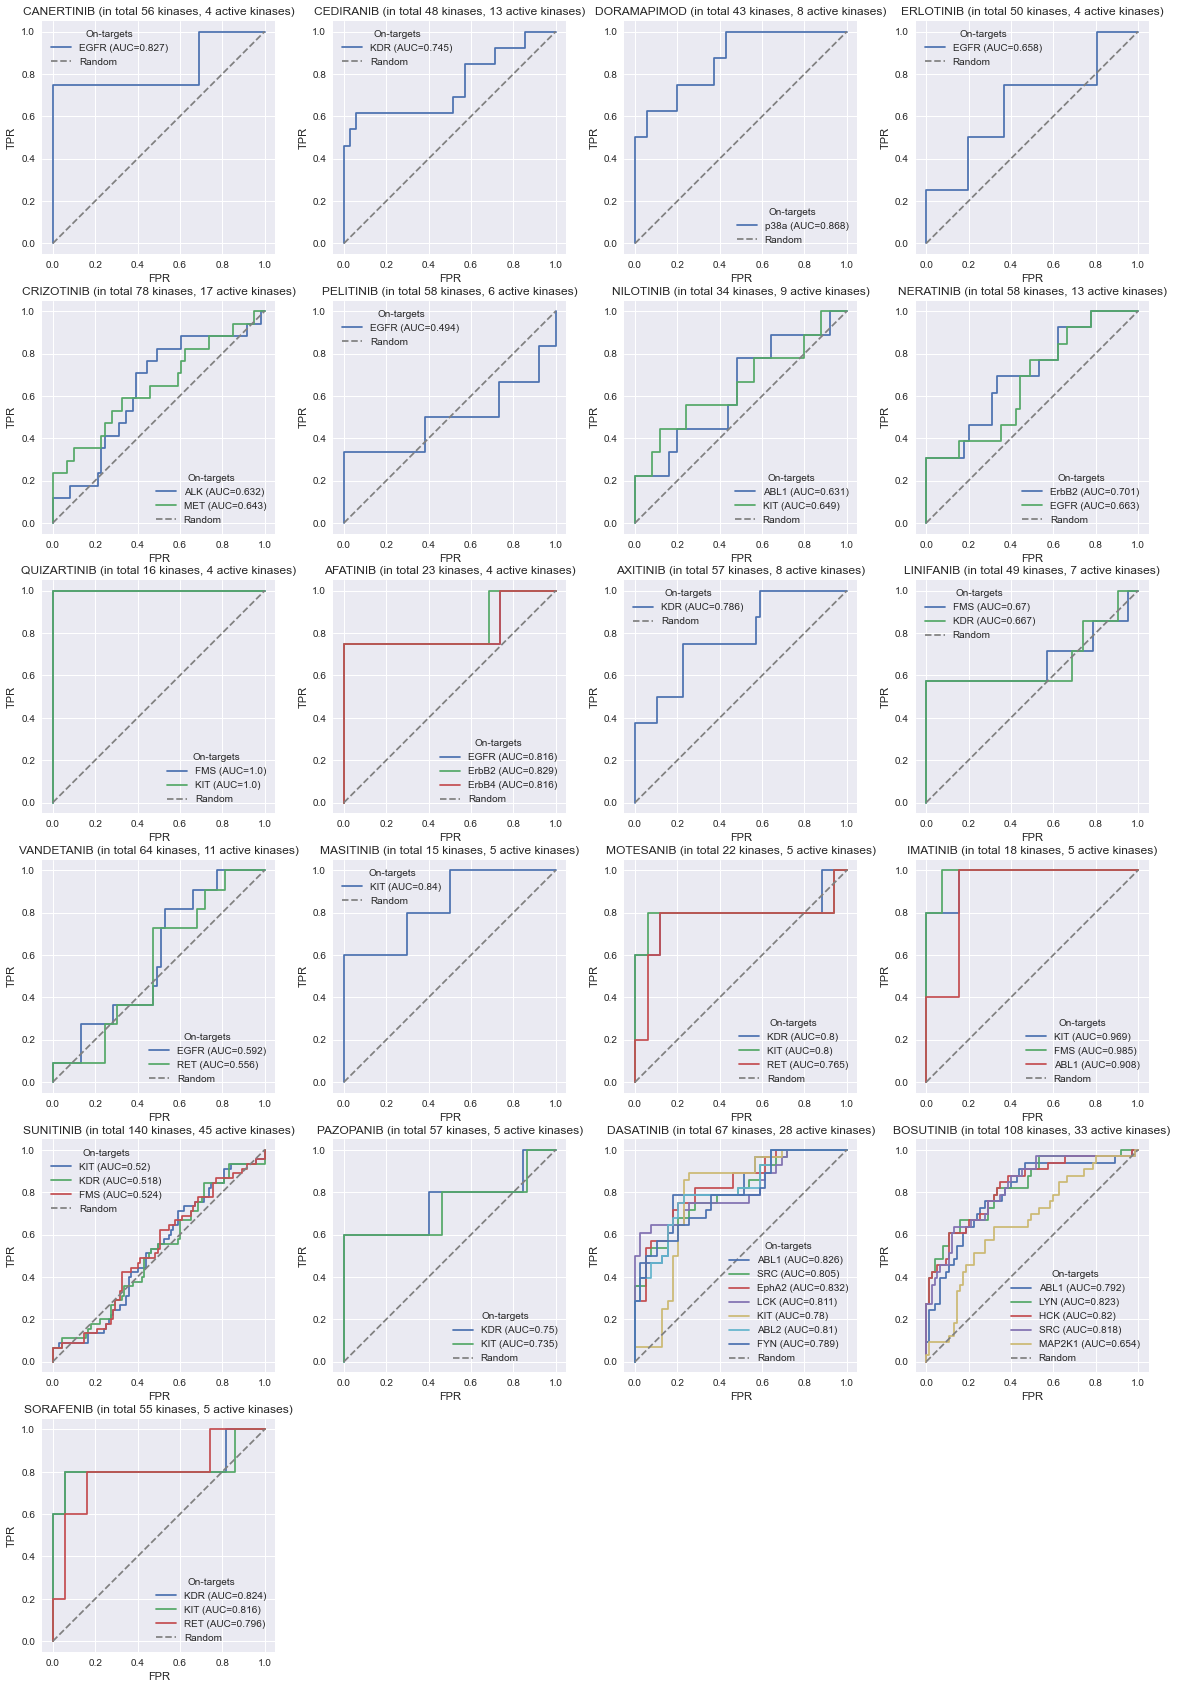

#### Kinase-kinase dataset: 011

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

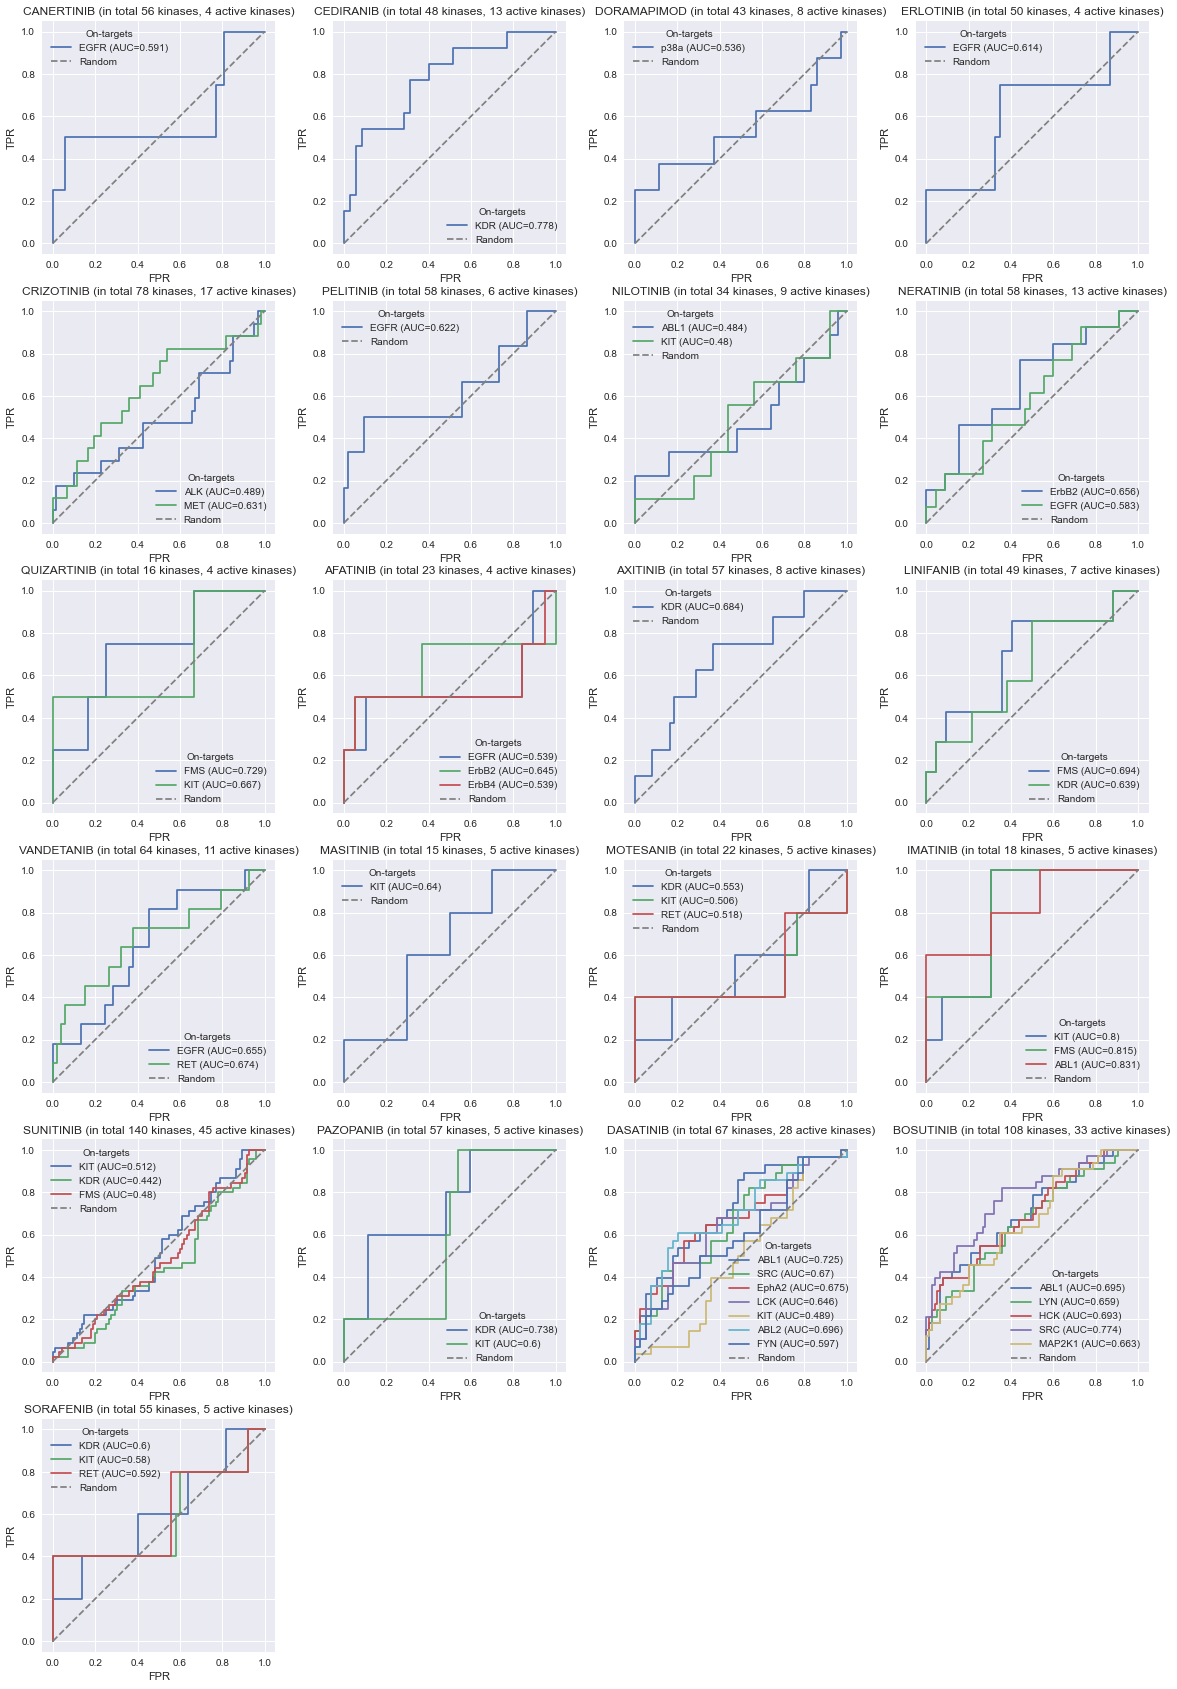

#### Kinase-kinase dataset: 101

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

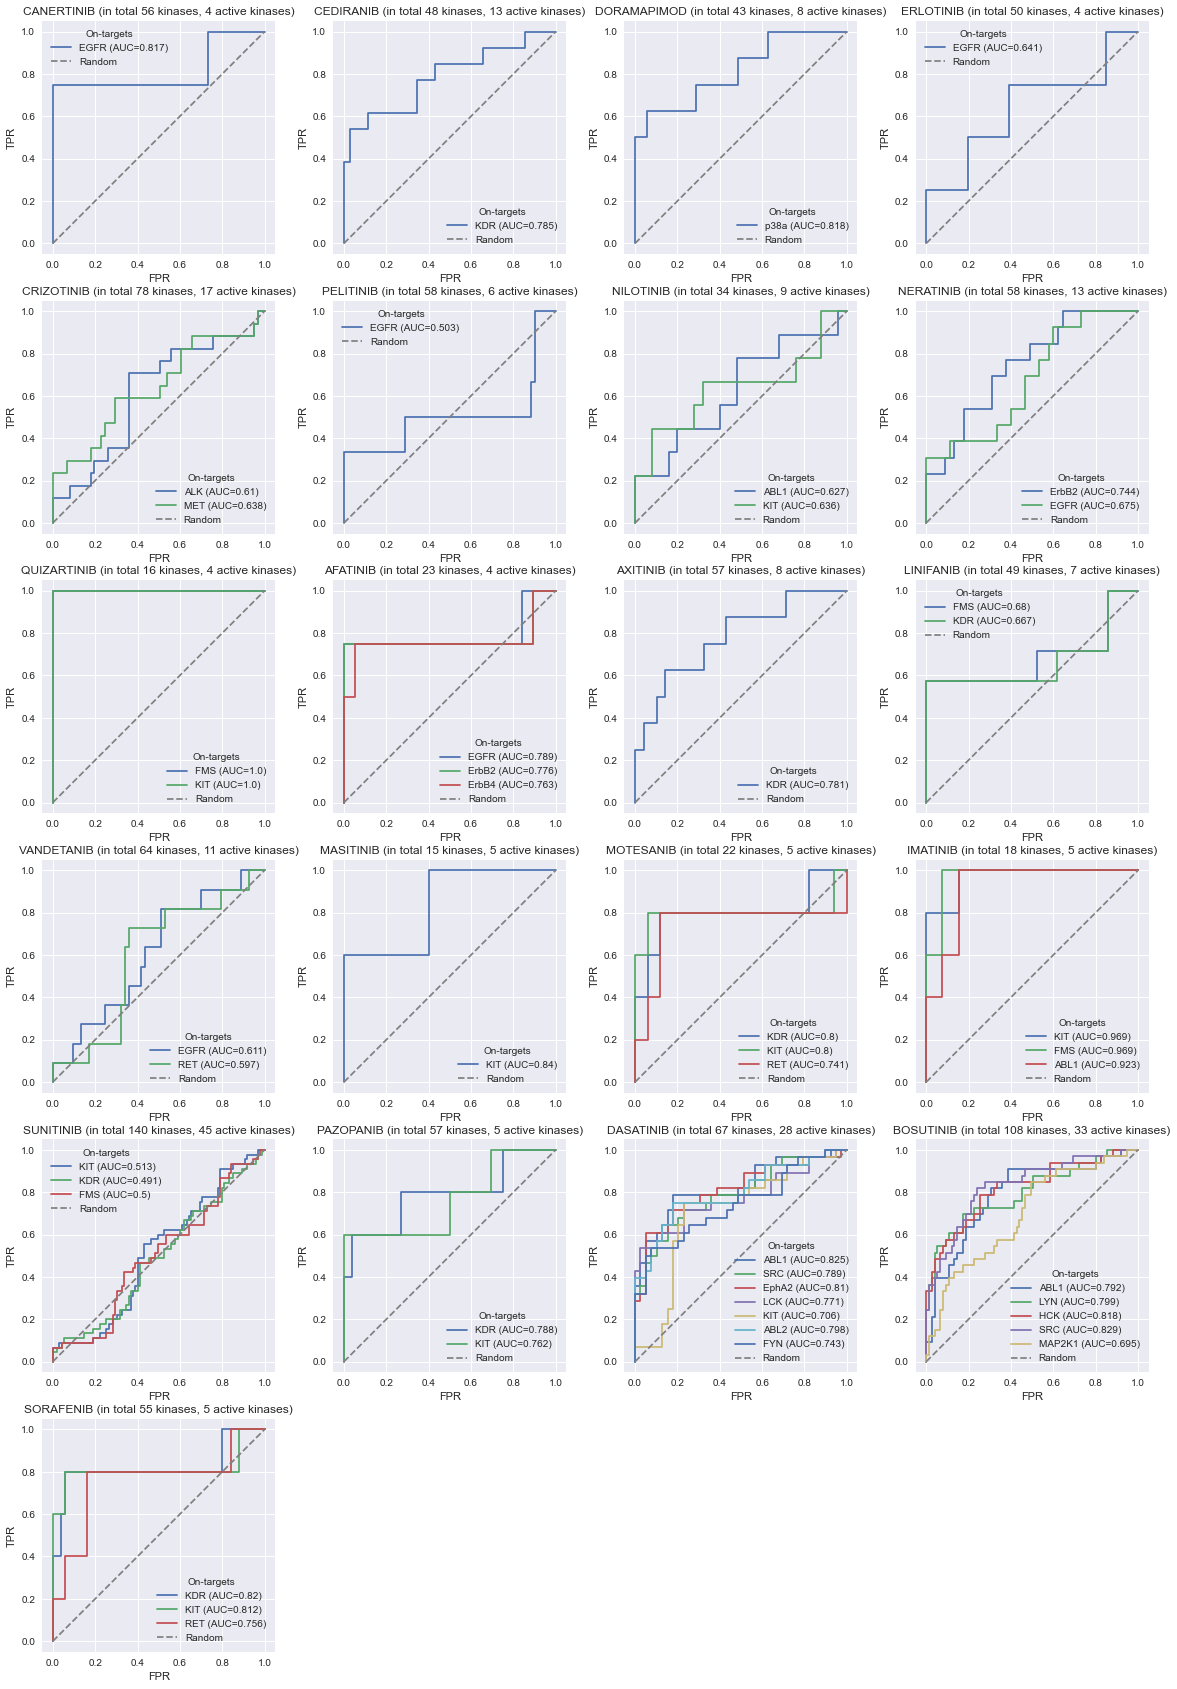

#### Kinase-kinase dataset: 111

No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference > 100; remove values           6
dtype: int64
No measurements                                                                 8964
One measurement                                                                 2298
Two identical measurements                                                       710
Two measurements <= or > cutoff 100; keep lower value                             23
One measurement <=, one > cutoff 100 but difference <= 100; keep lower value       1
One measurement <=, one > cutoff 100 but difference 

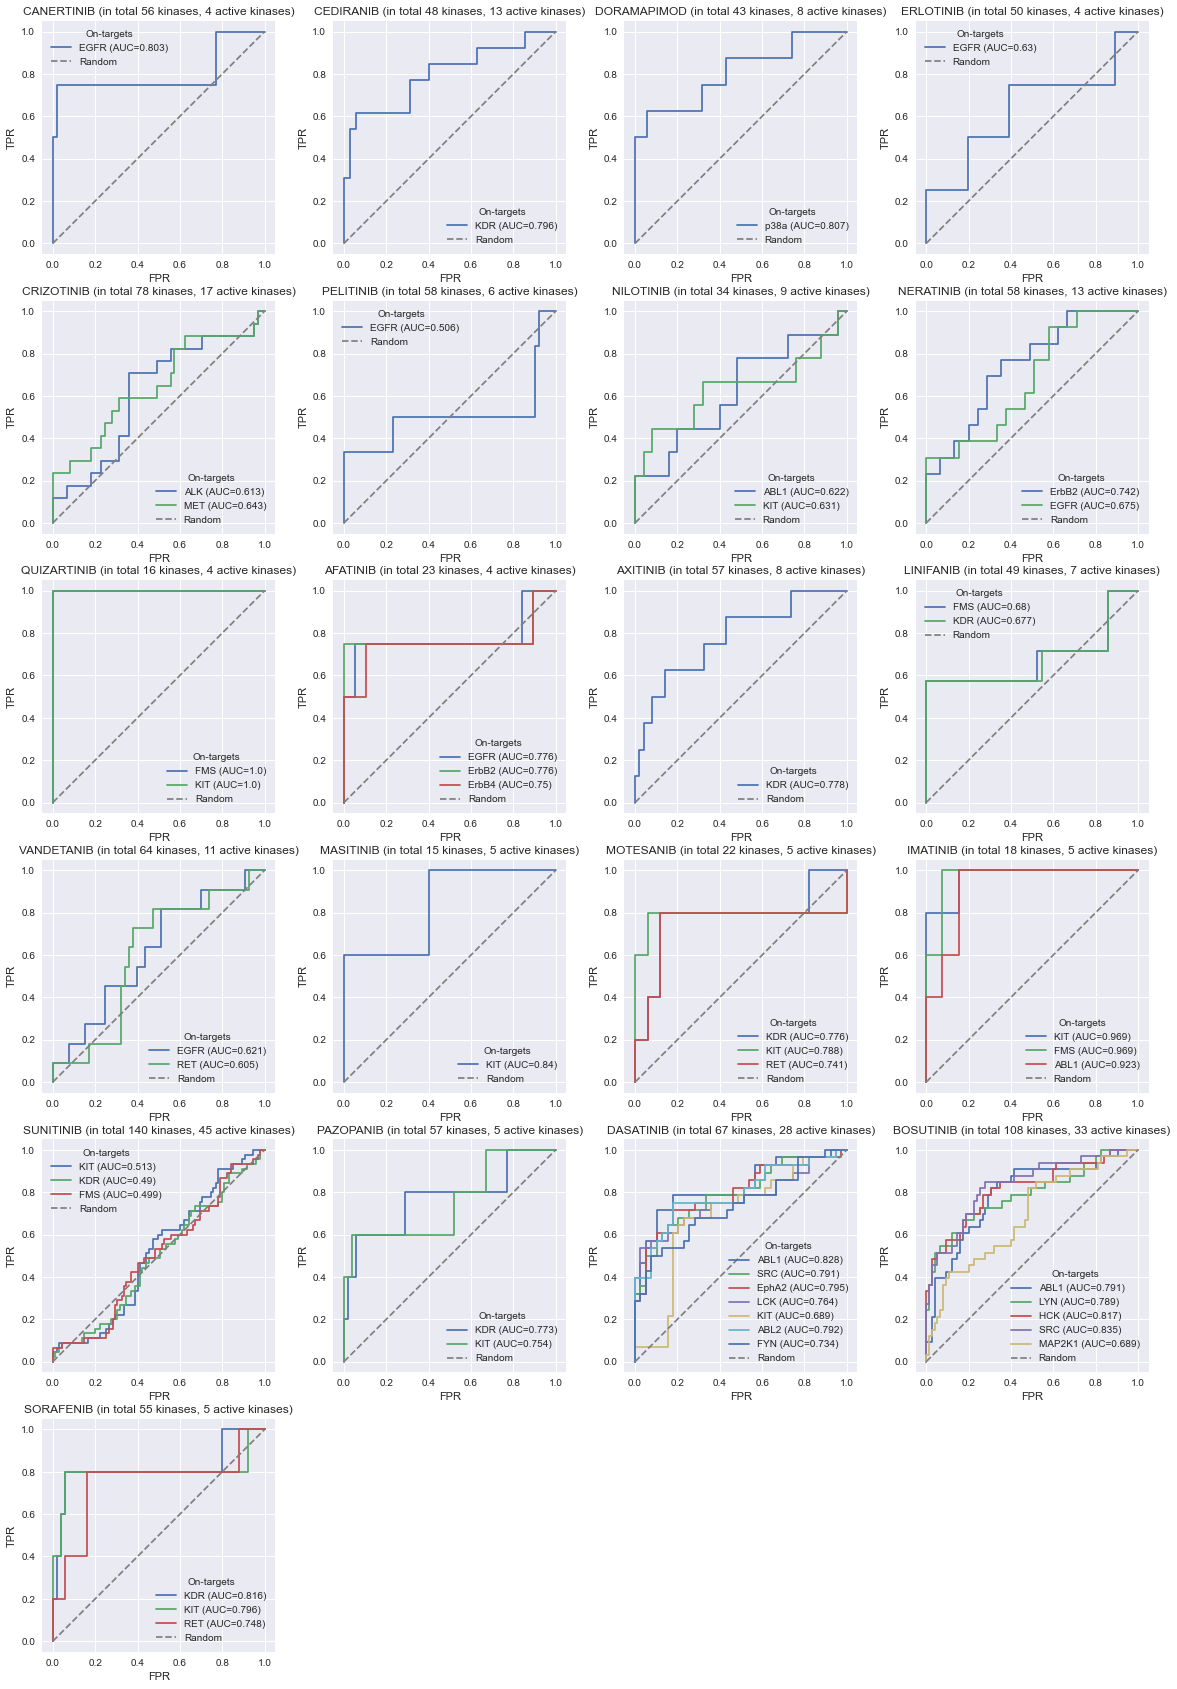

### Ligand profiling method: karaman

#### Kinase-kinase dataset: 15

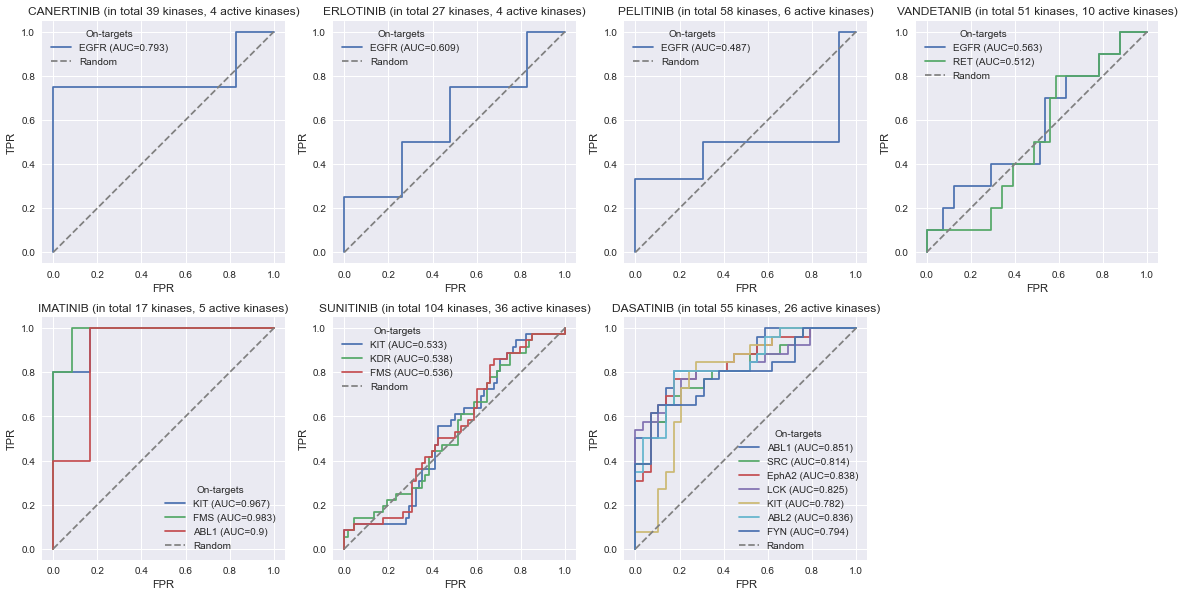

#### Kinase-kinase dataset: 100

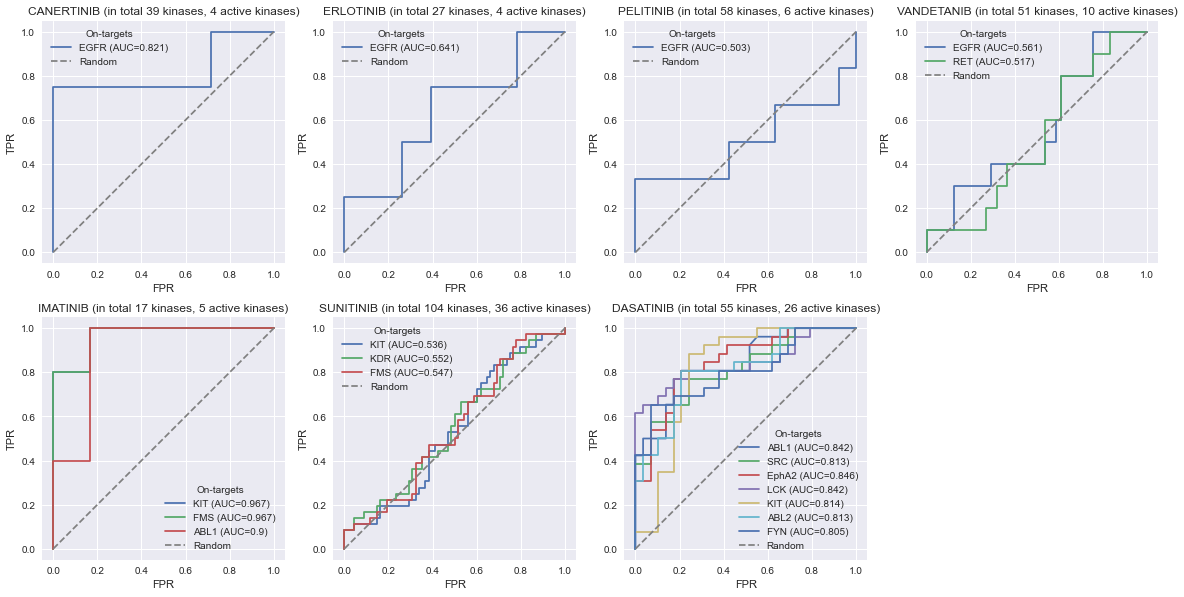

#### Kinase-kinase dataset: 010

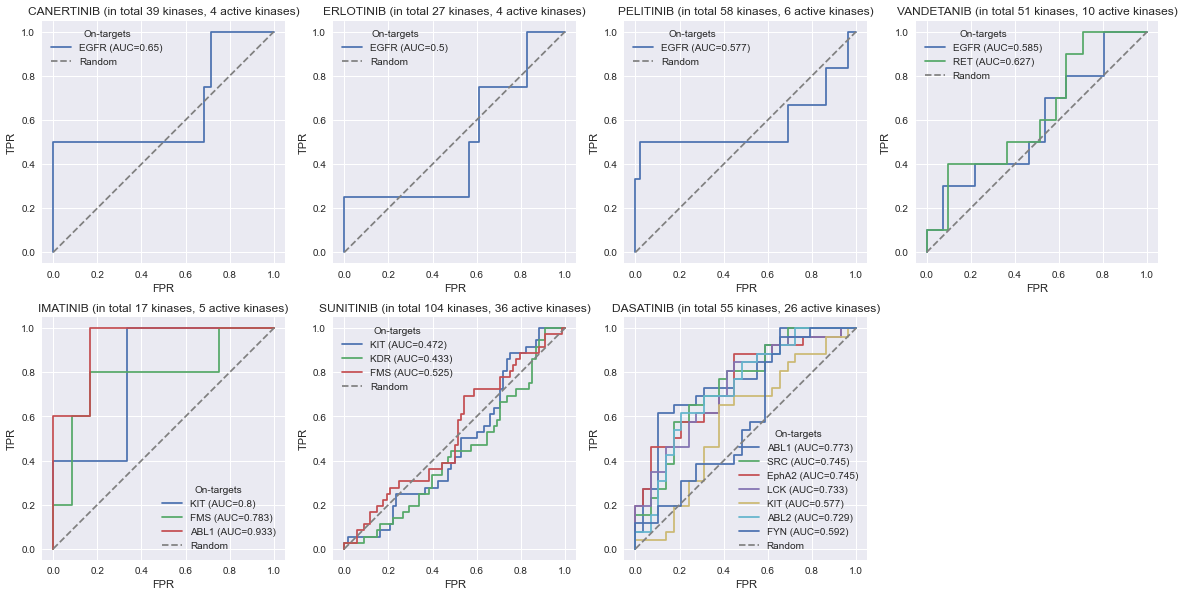

#### Kinase-kinase dataset: 001

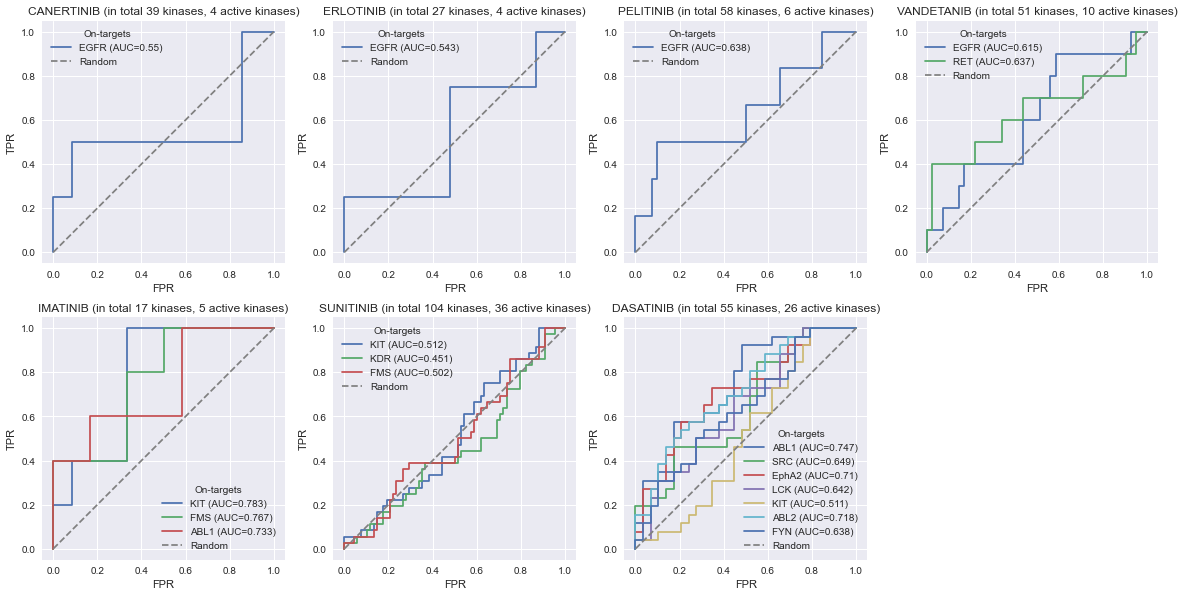

#### Kinase-kinase dataset: 110

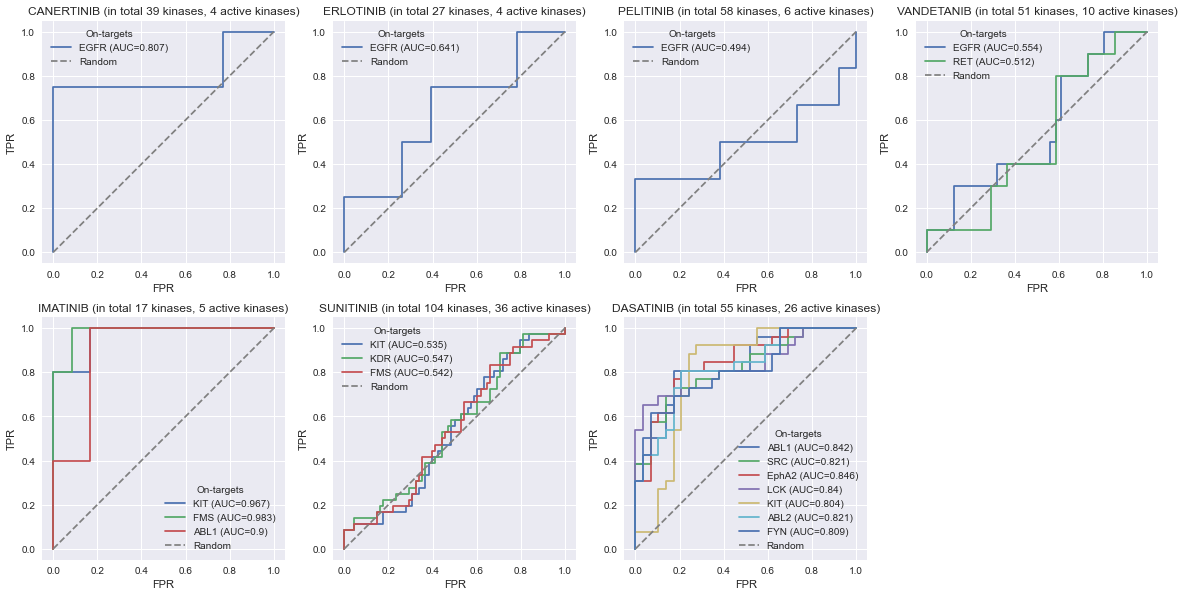

#### Kinase-kinase dataset: 011

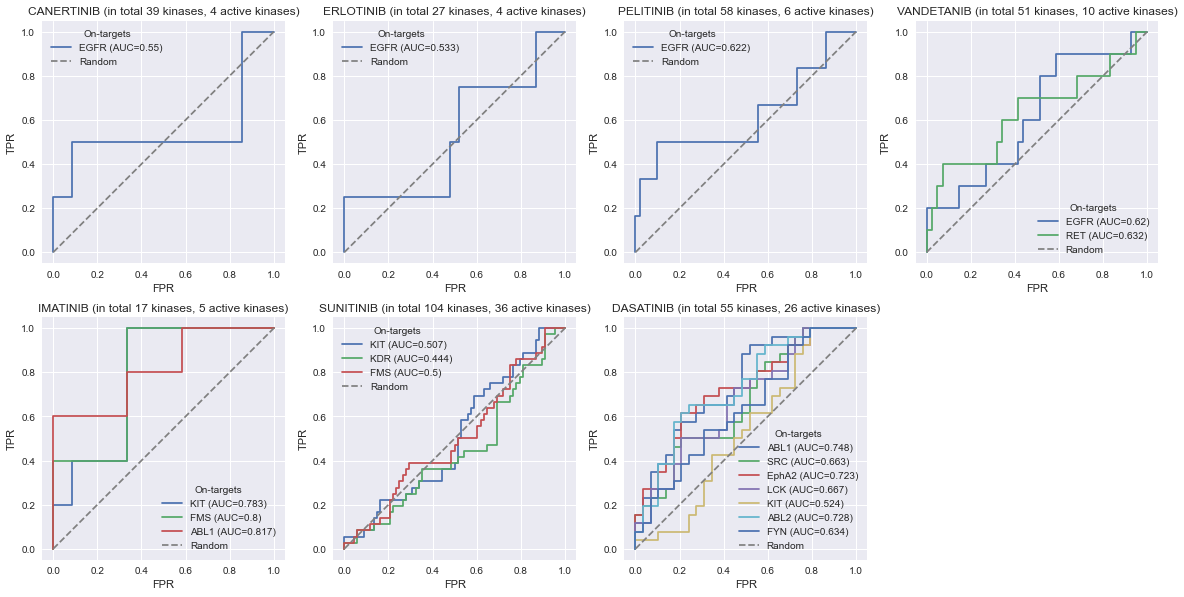

#### Kinase-kinase dataset: 101

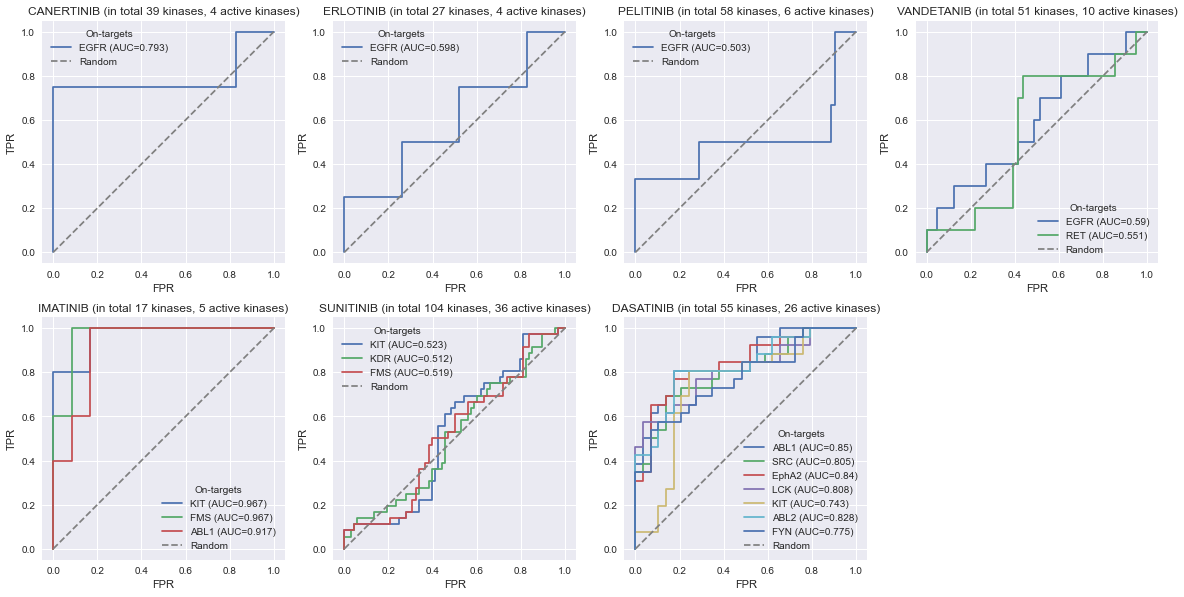

#### Kinase-kinase dataset: 111

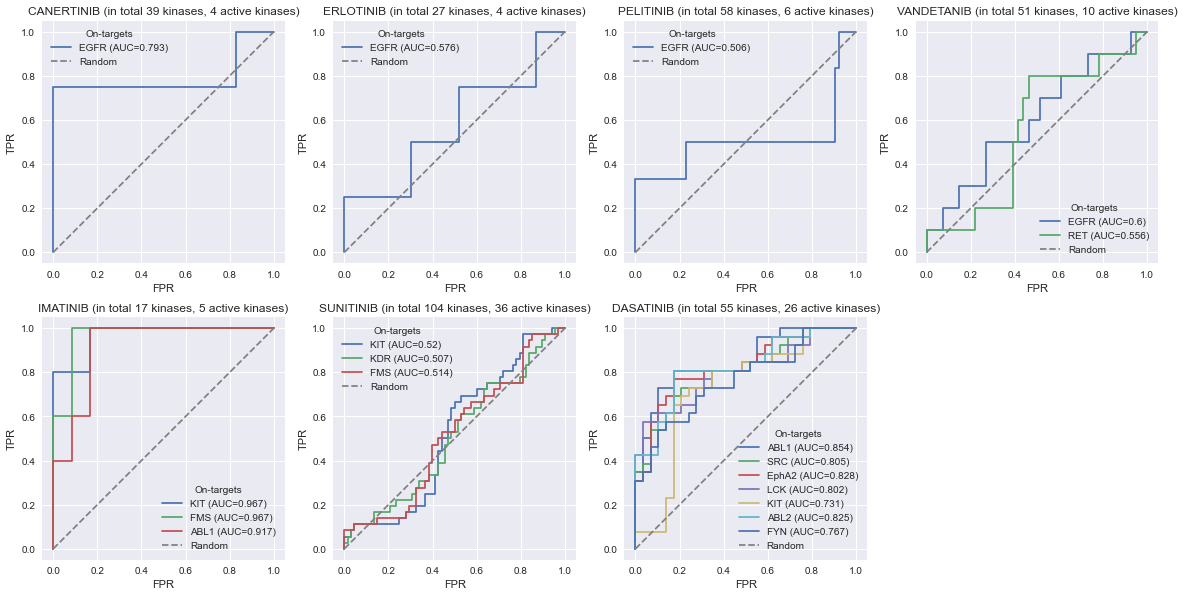

### Ligand profiling method: davis

#### Kinase-kinase dataset: 15

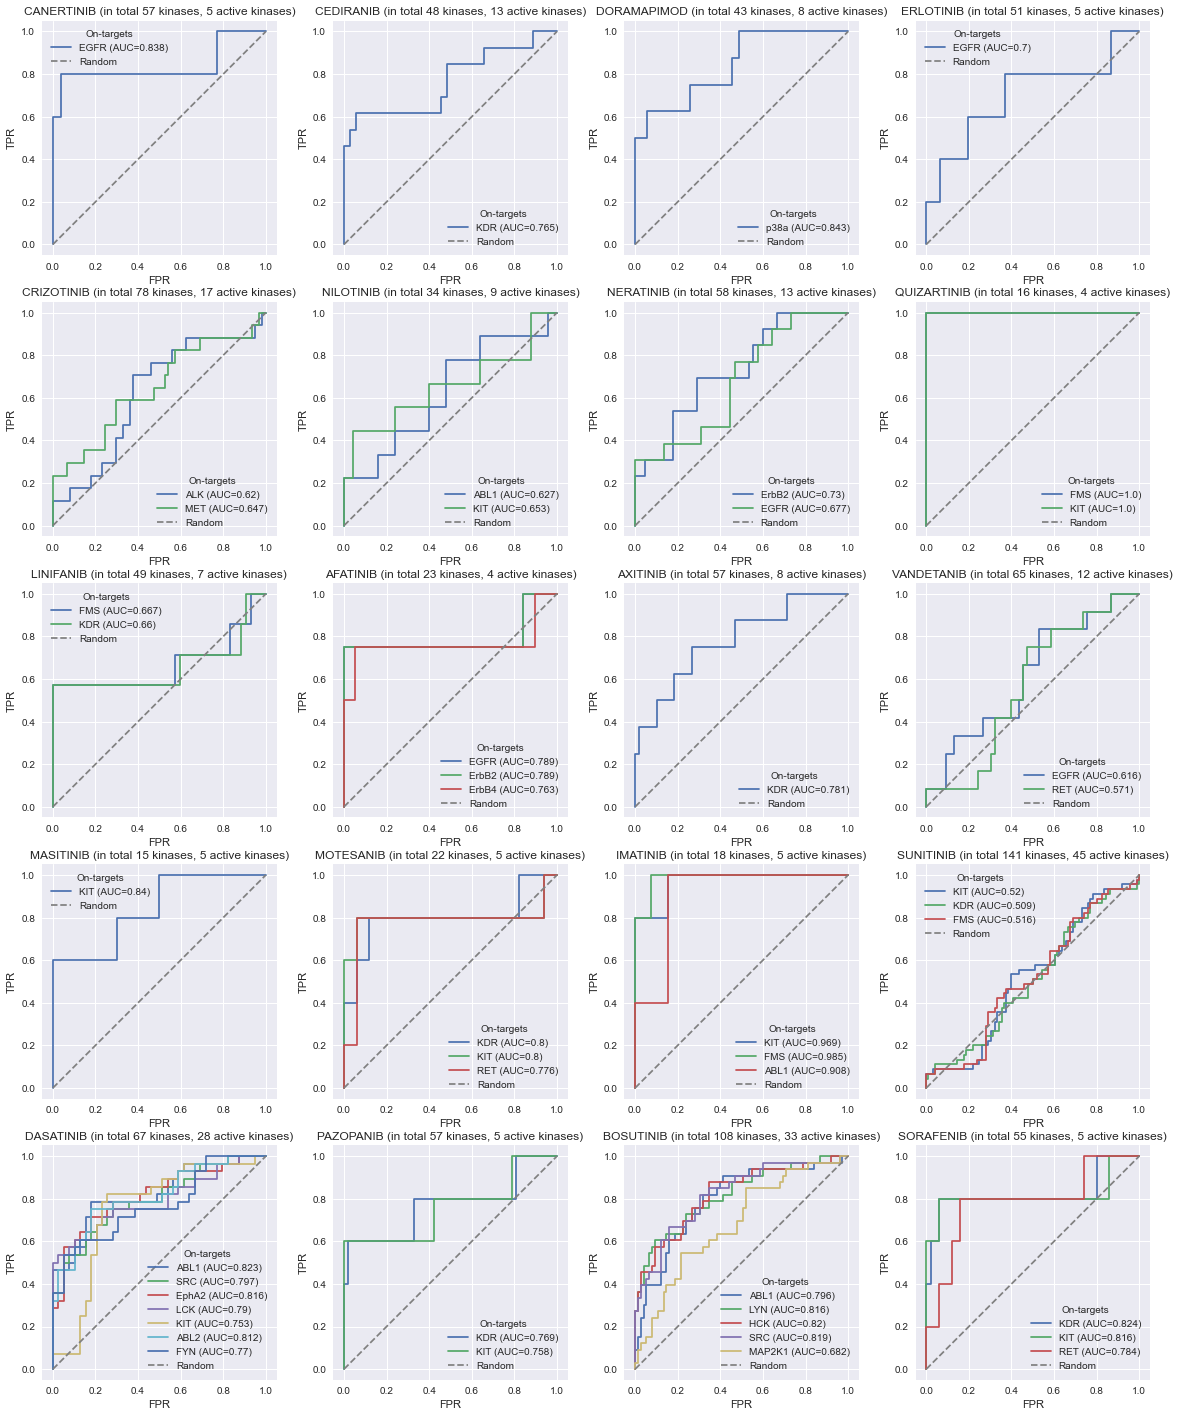

#### Kinase-kinase dataset: 100

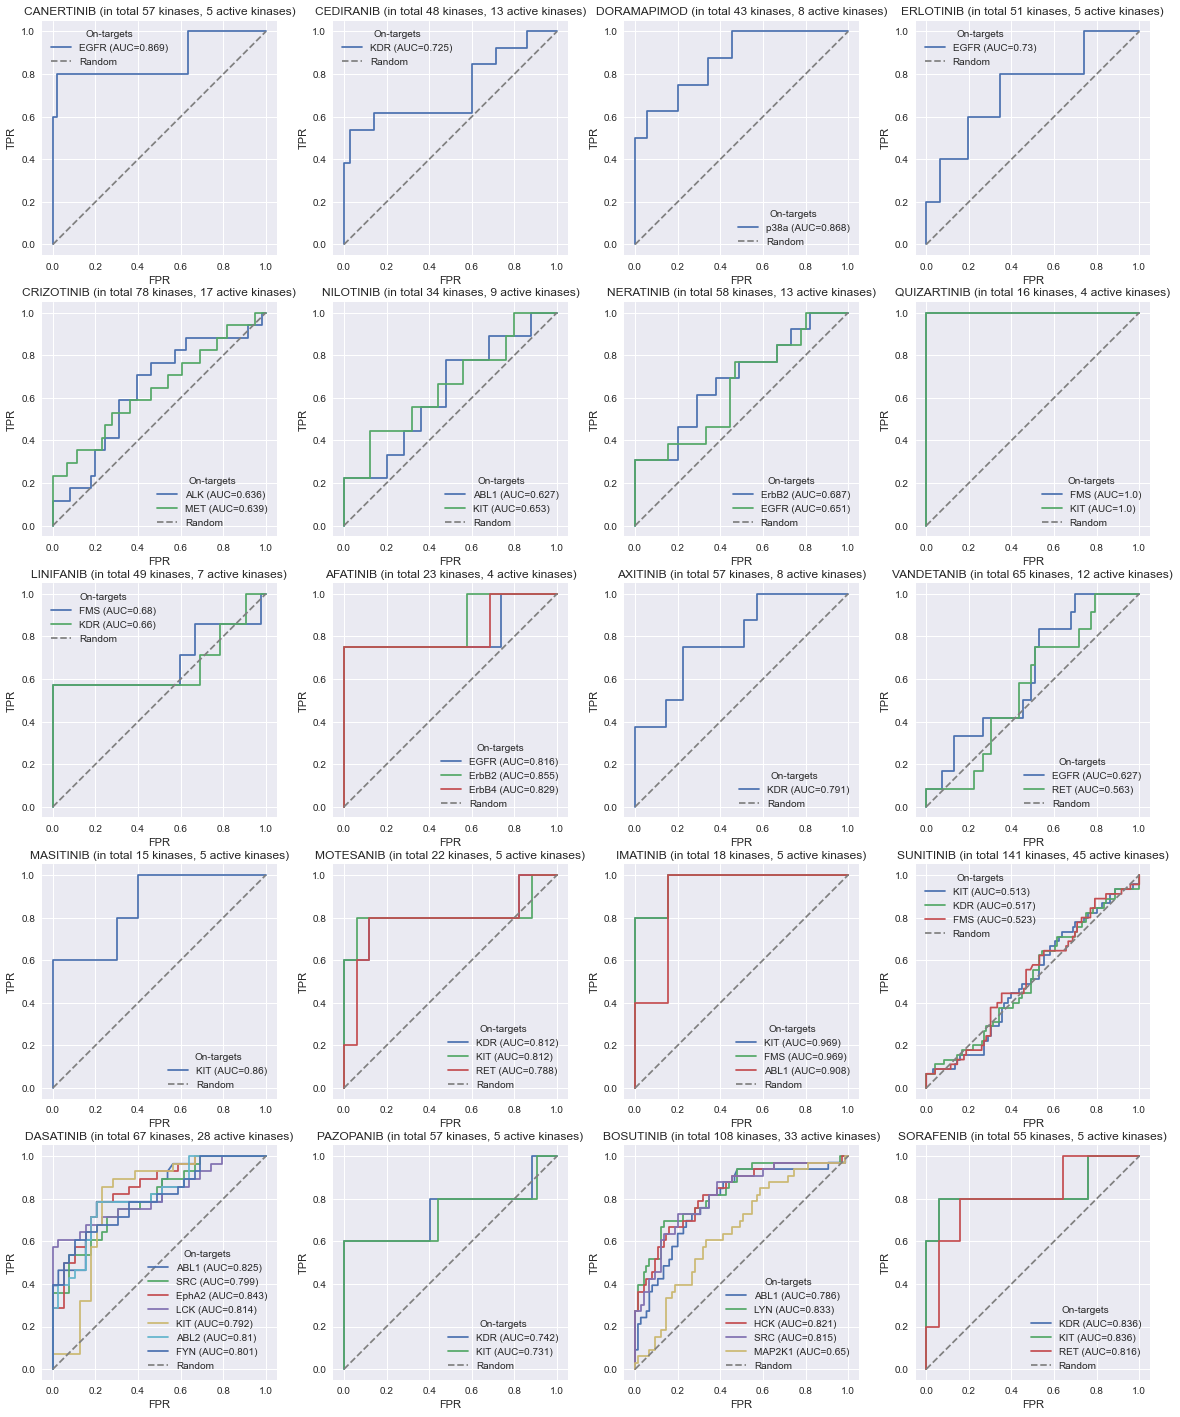

#### Kinase-kinase dataset: 010

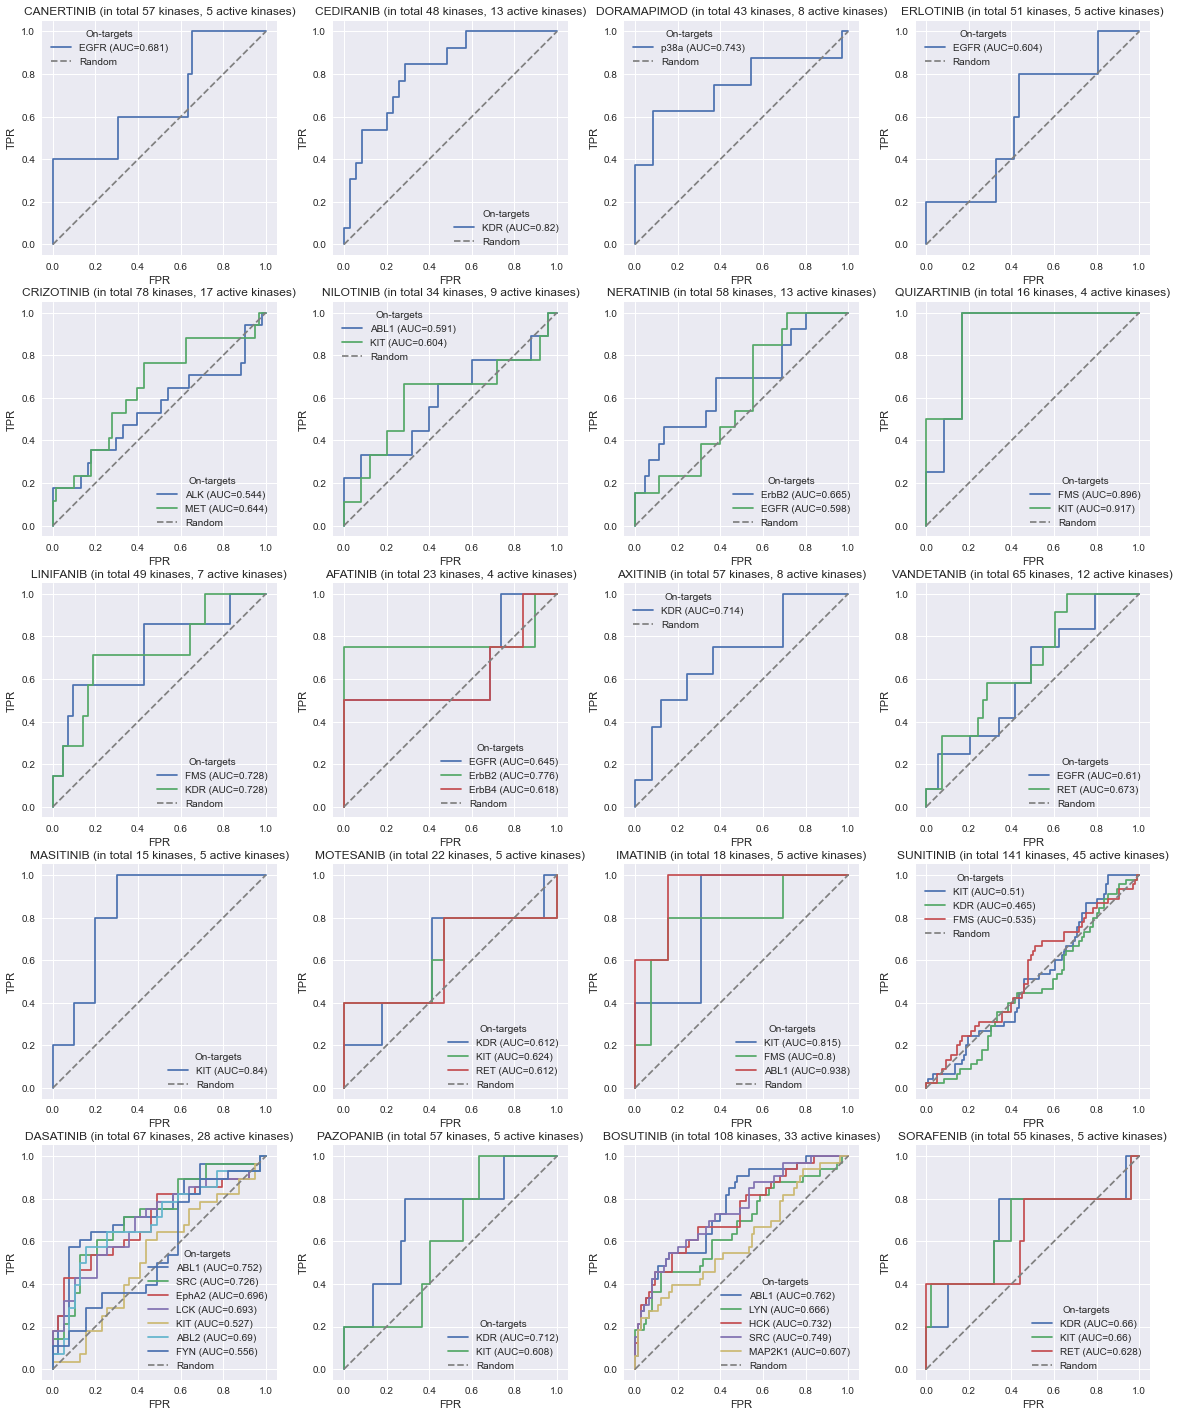

#### Kinase-kinase dataset: 001

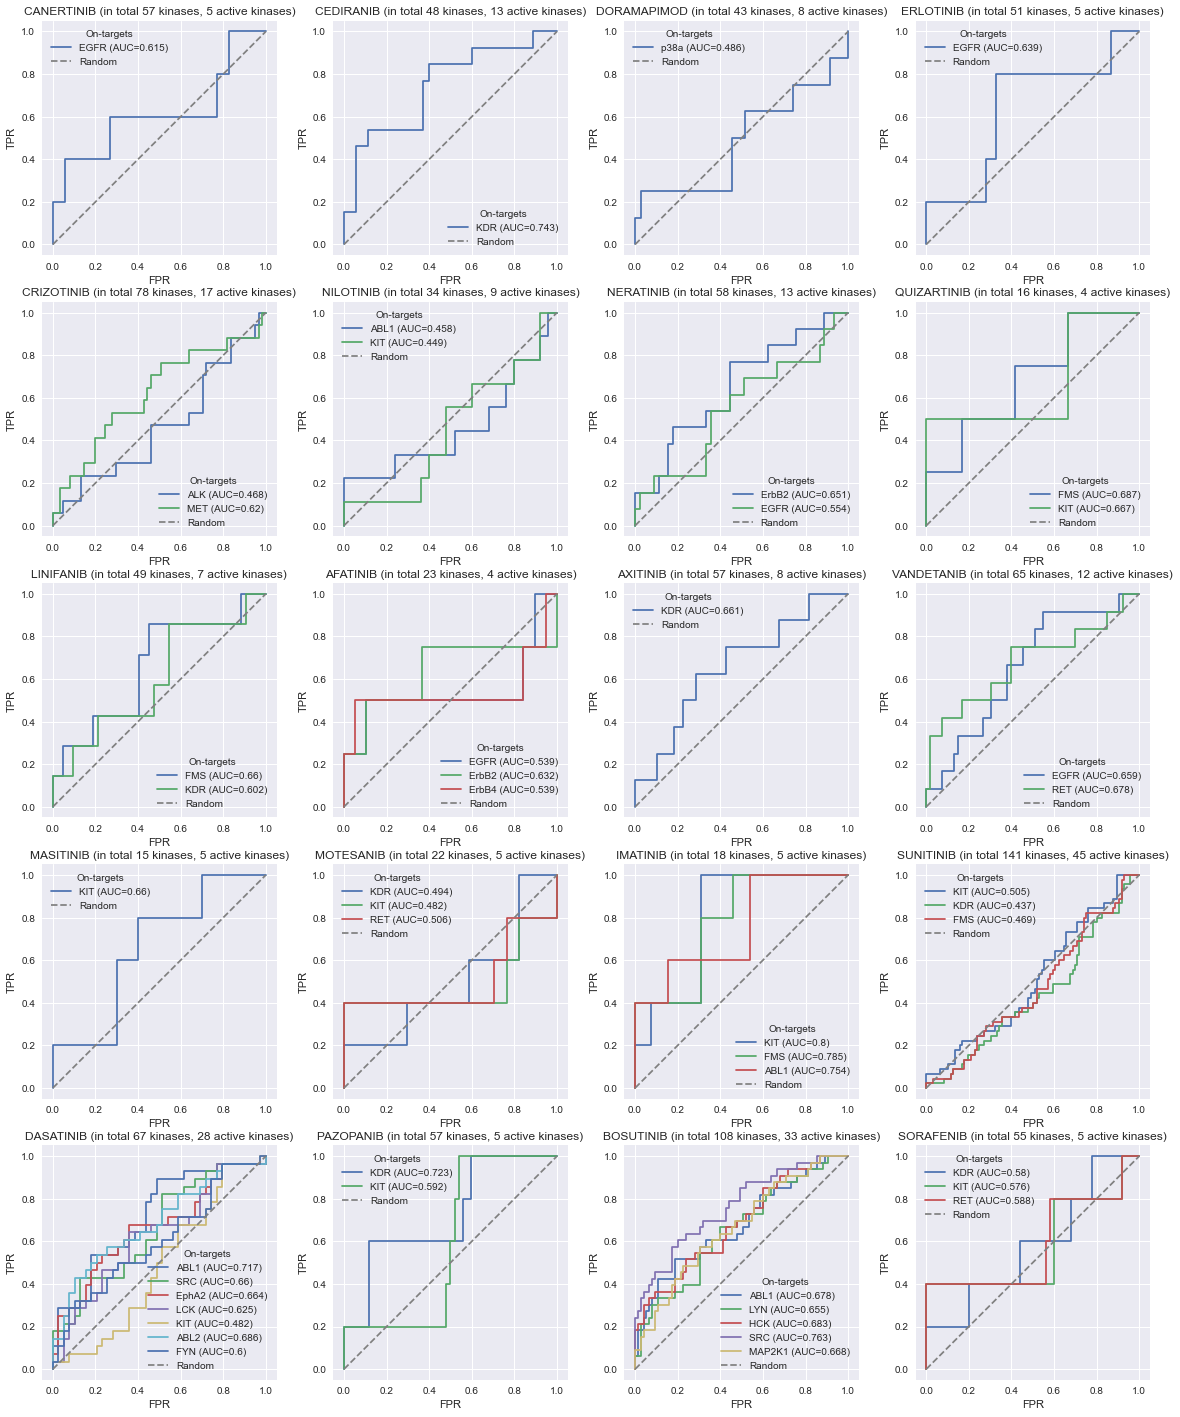

#### Kinase-kinase dataset: 110

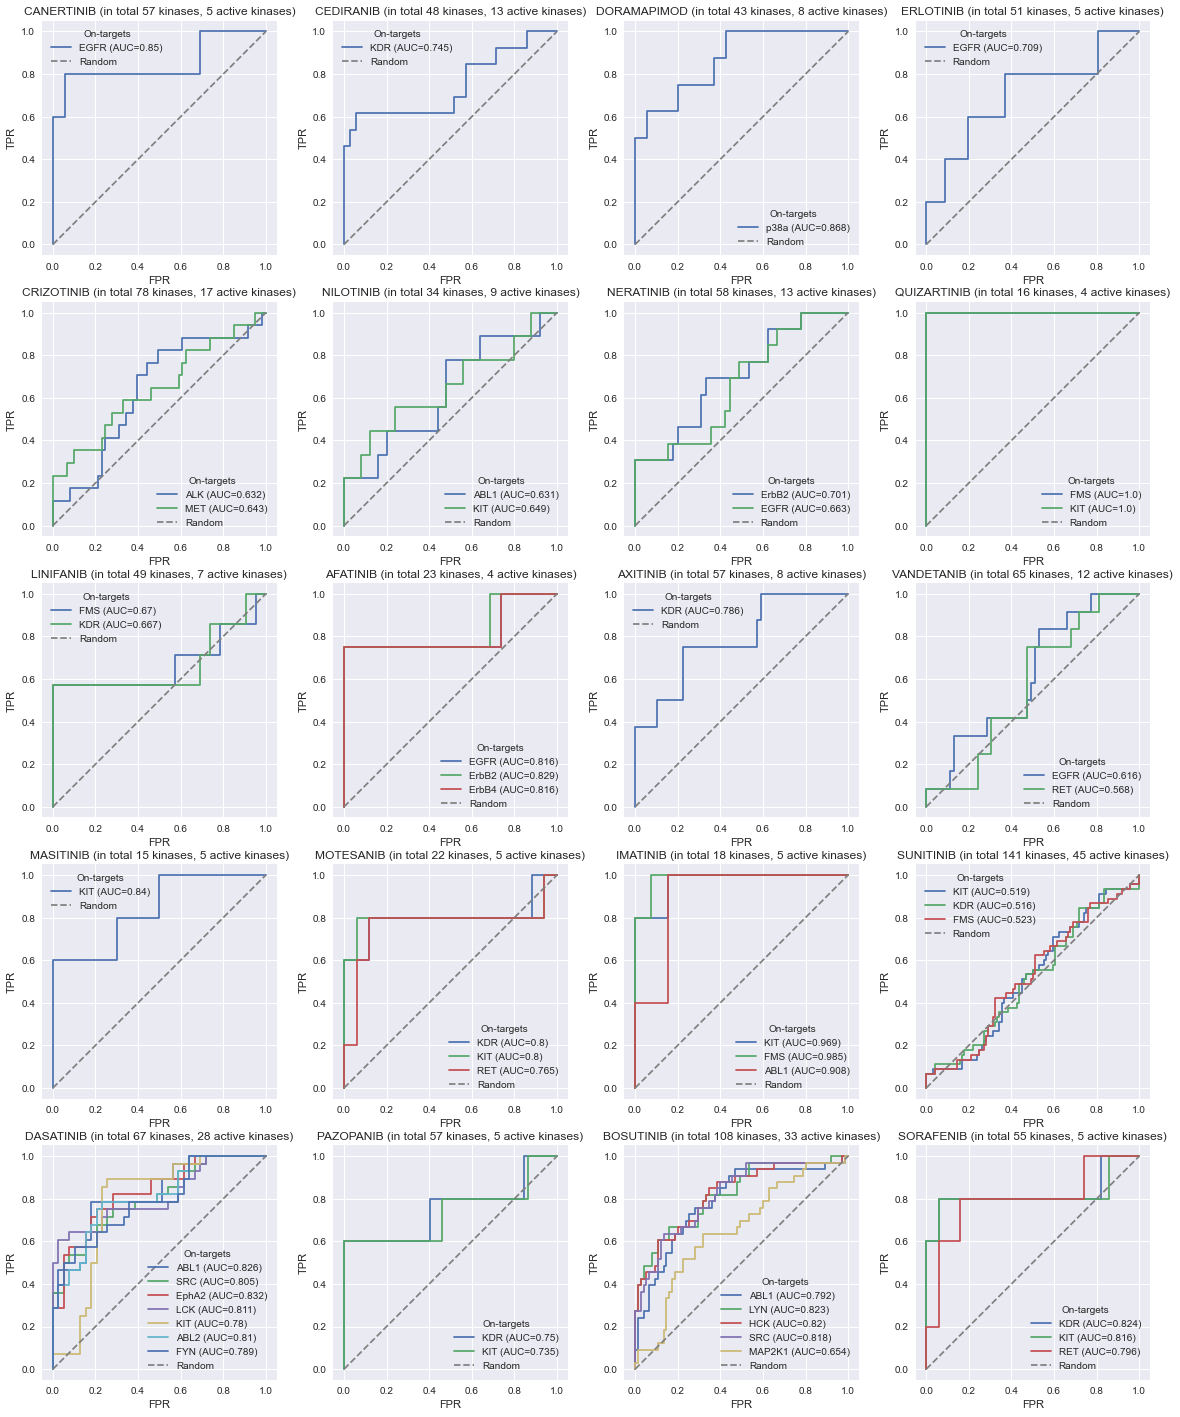

#### Kinase-kinase dataset: 011

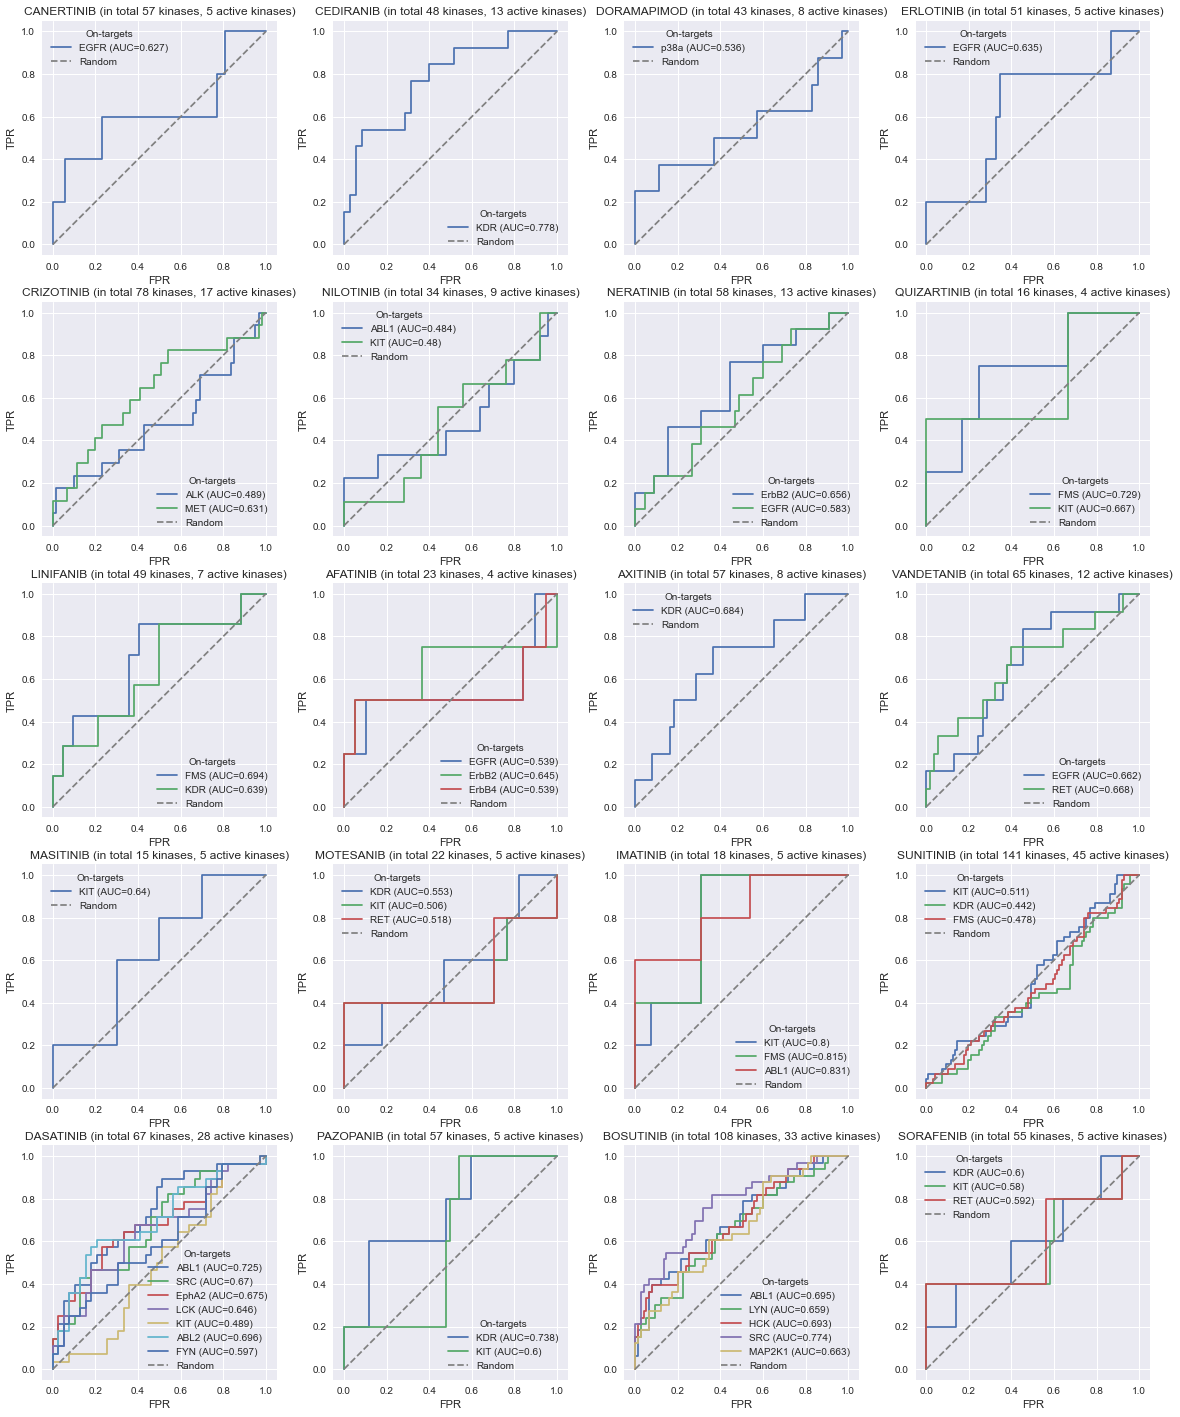

#### Kinase-kinase dataset: 101

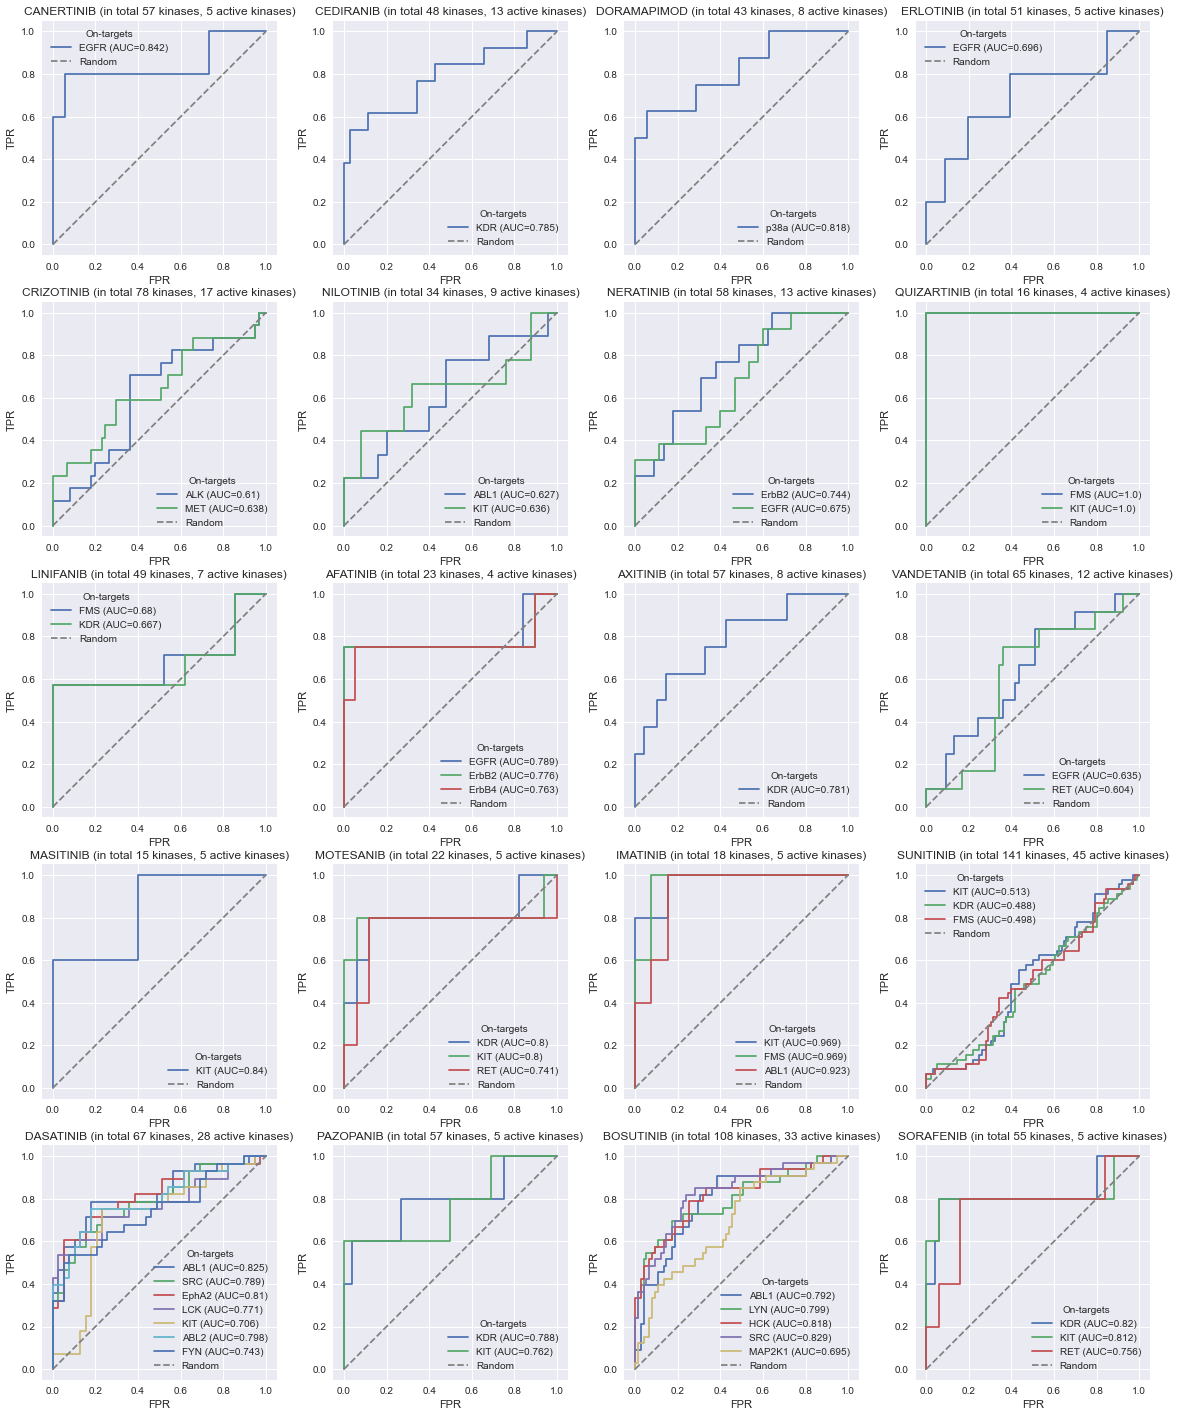

#### Kinase-kinase dataset: 111

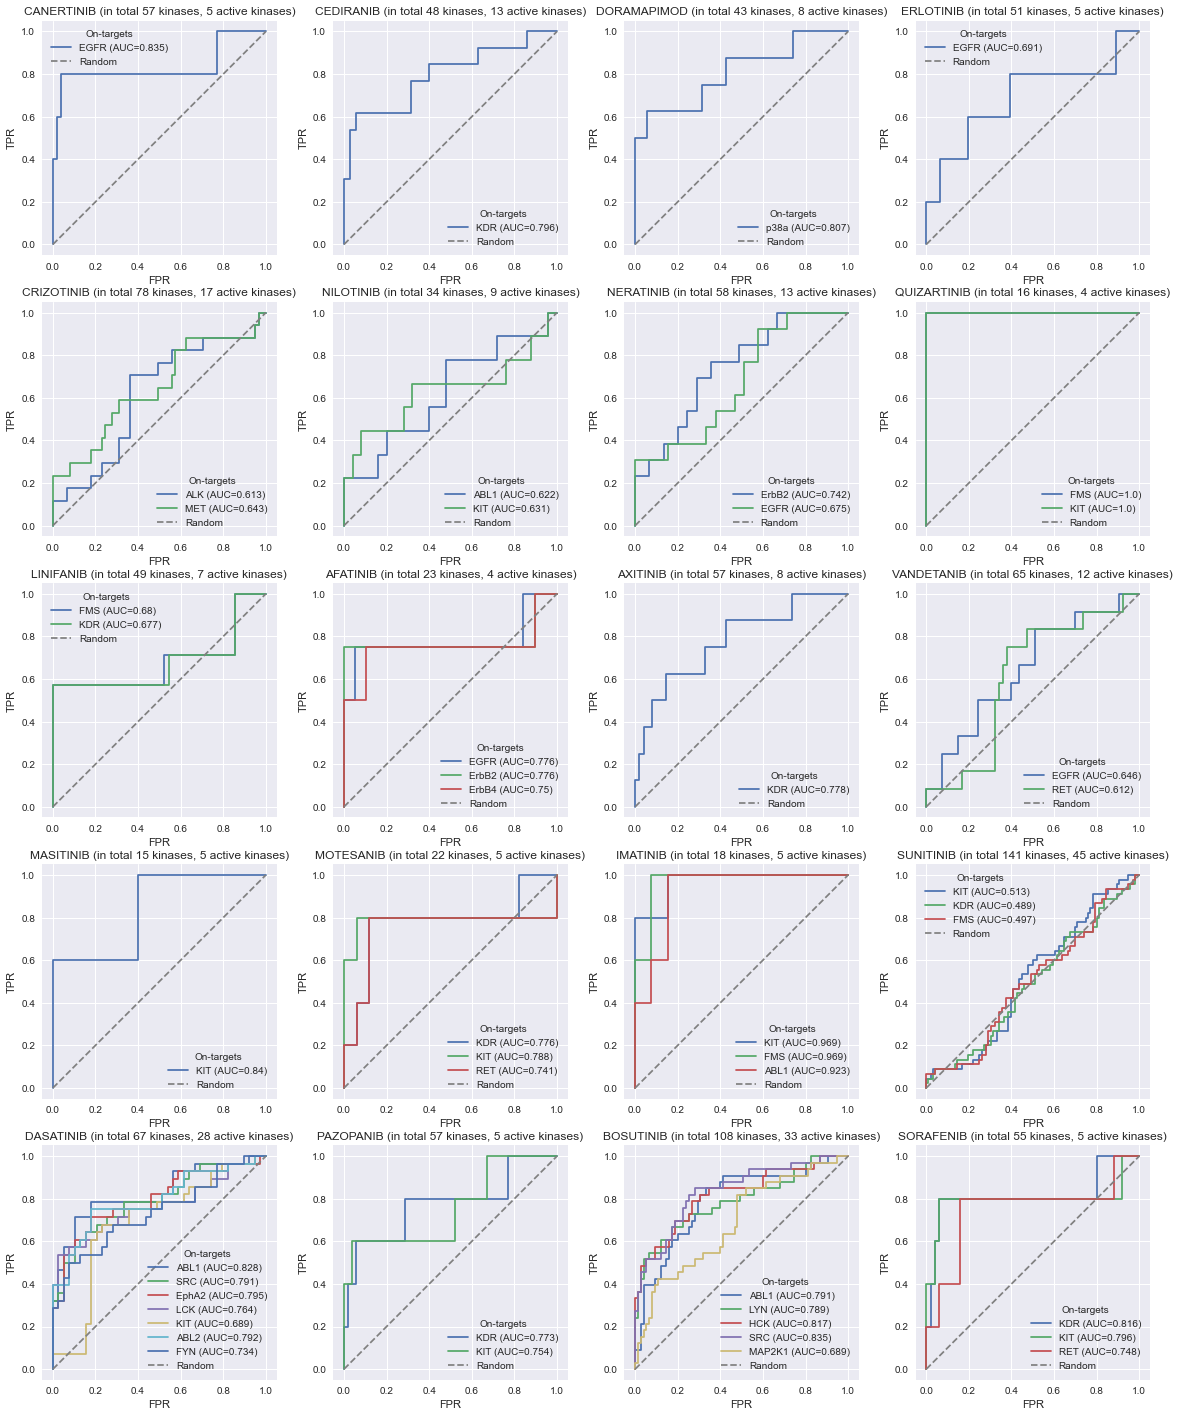

In [7]:
auc_dict = {}

for ligand_profiling_method in ligand_profiling_methods:
    display(Markdown(f"### Ligand profiling method: {ligand_profiling_method}"))
    auc_dict[ligand_profiling_method] = {}

    for suffix in suffixes:

        # Set path to file
        display(Markdown(f"#### Kinase-kinase dataset: {suffix}"))
        if suffix == "15":
            KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
        else:
            KINASE_KINASE_PATH = RESULTS / f"fingerprint_distances_{suffix}.csv.bz2"

        # Kinase-kinase distances dataset
        kissim_df = data.distances.kissim(
            structure_kinase_mapping_by="minimum",
            kinmap_kinases=True,
            distances_path=KINASE_KINASE_PATH,
        )
        # Kinase-ligand profiling dataset
        profiling_df = data.profiling.load(
            ligand_profiling_method, pkidb_ligands=True, fda_approved=True
        )

        ligand_names = profiling_df.columns
        ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
        ligand_kinase_pairs = (
            ligand_targets[["ligand.input", "targets.kinmap"]]
            .explode("targets.kinmap")
            .to_numpy()
            .tolist()
        )
        evaluator = LigandVsKinaseEvaluator(
            ligand_kinase_pairs,
            ligand_profiling_method,
            KINASE_DISTANCES_METHOD,
            KINASE_ACTIVITY_CUTOFF,
            KINASE_ACTIVITY_MAX,
            MIN_N_SHARED_KINASES,
            MIN_N_SHARED_ACTIVE_KINASES,
            kinase_kinase_path=KINASE_KINASE_PATH,
        )
        aucs = evaluator.plot_roc_curves()
        # output_file = f"roc_{ligand_profiling_method}_{suffix}.png"
        # auc_list = evaluator.plot_roc_curves(output_file=output_file)
        plt.show()
        auc_dict[ligand_profiling_method][suffix] = aucs

    auc_df = pd.DataFrame(auc_dict[ligand_profiling_method])
    (RESULTS / "auc").mkdir(parents=True, exist_ok=True)
    auc_df.to_csv(RESULTS / f"auc/auc_kissim_vs_{ligand_profiling_method}__feature_weights.csv")

## Plot AUC distribution

### Ligand profiling method: karaman-davis

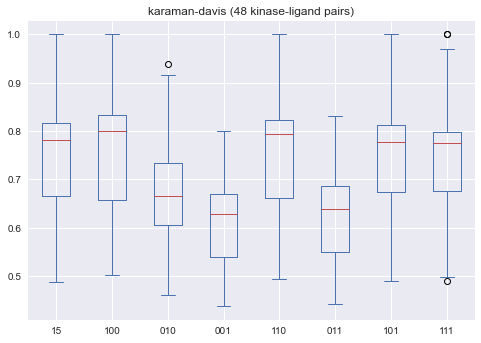

### Ligand profiling method: karaman

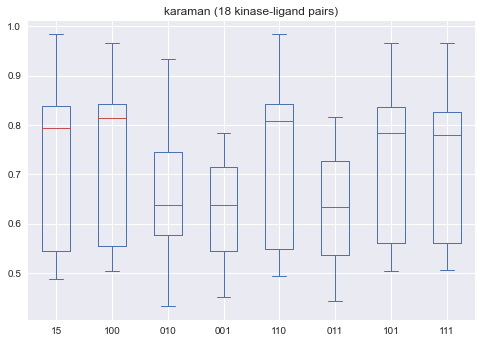

### Ligand profiling method: davis

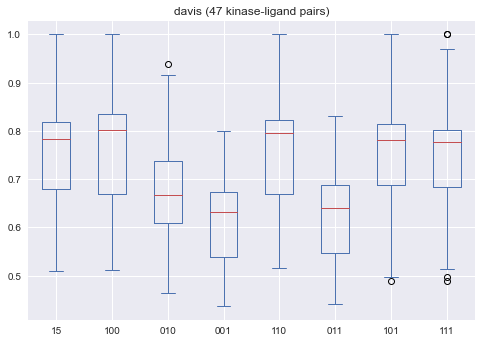

In [8]:
for profiling_name, auc in auc_dict.items():
    display(Markdown(f"### Ligand profiling method: {profiling_name}"))
    auc_df = pd.DataFrame(auc)
    auc_df.plot(kind="box", title=f"{profiling_name} ({auc_df.shape[0]} kinase-ligand pairs)")
    # plt.savefig(f"auc_{profiling_name}.png", bbox_inches="tight", dpi=300)
    plt.show()

## Scatter AUC values between weighting schemes

Use only best performing feature weights:

In [9]:
best_feature_weights = ["15", "100", "110", "101", "111"]

### Ligand profiling method: karaman-davis

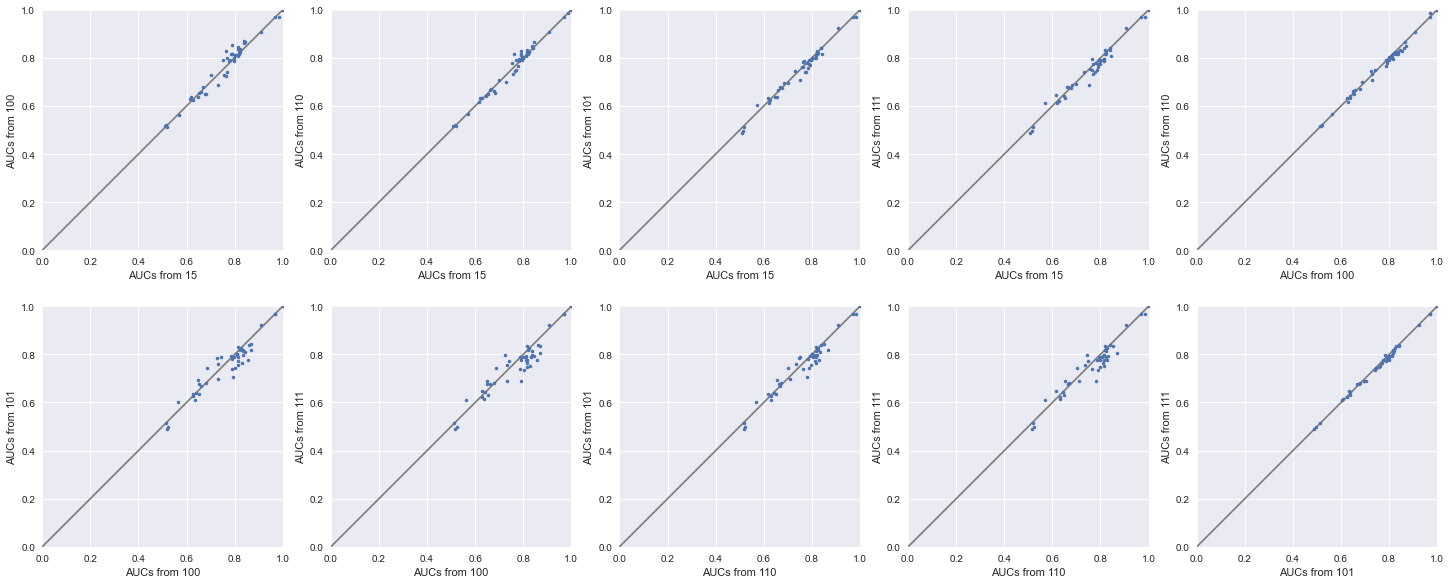

### Ligand profiling method: karaman

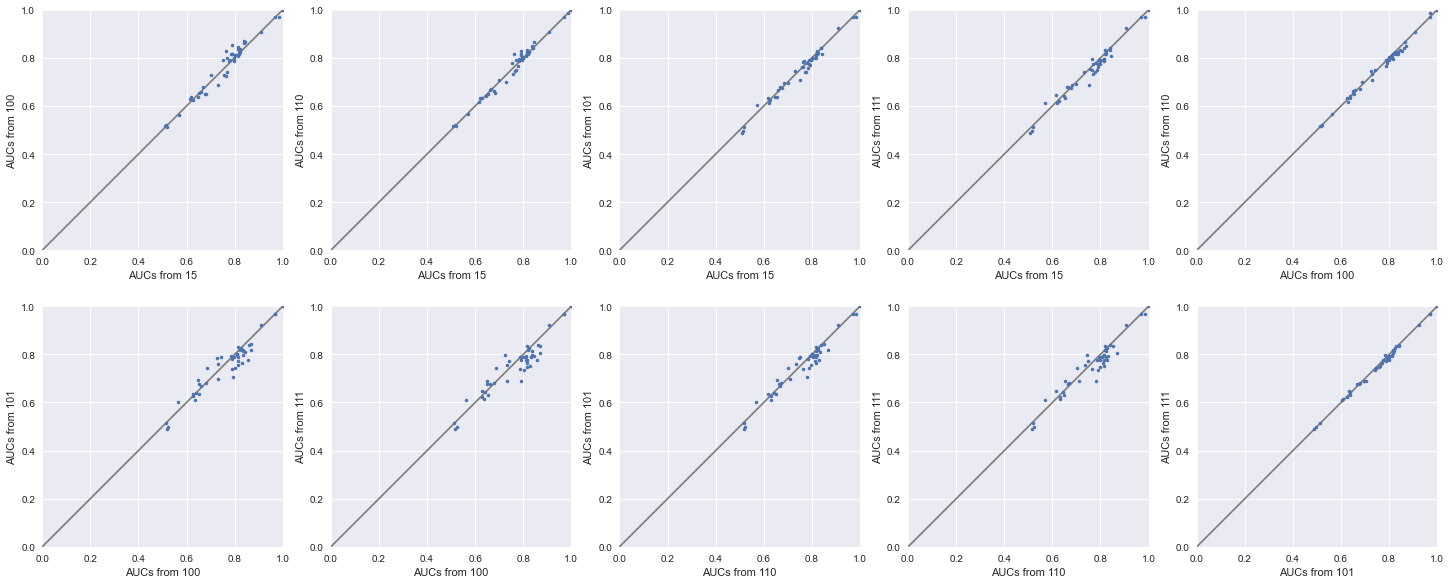

### Ligand profiling method: davis

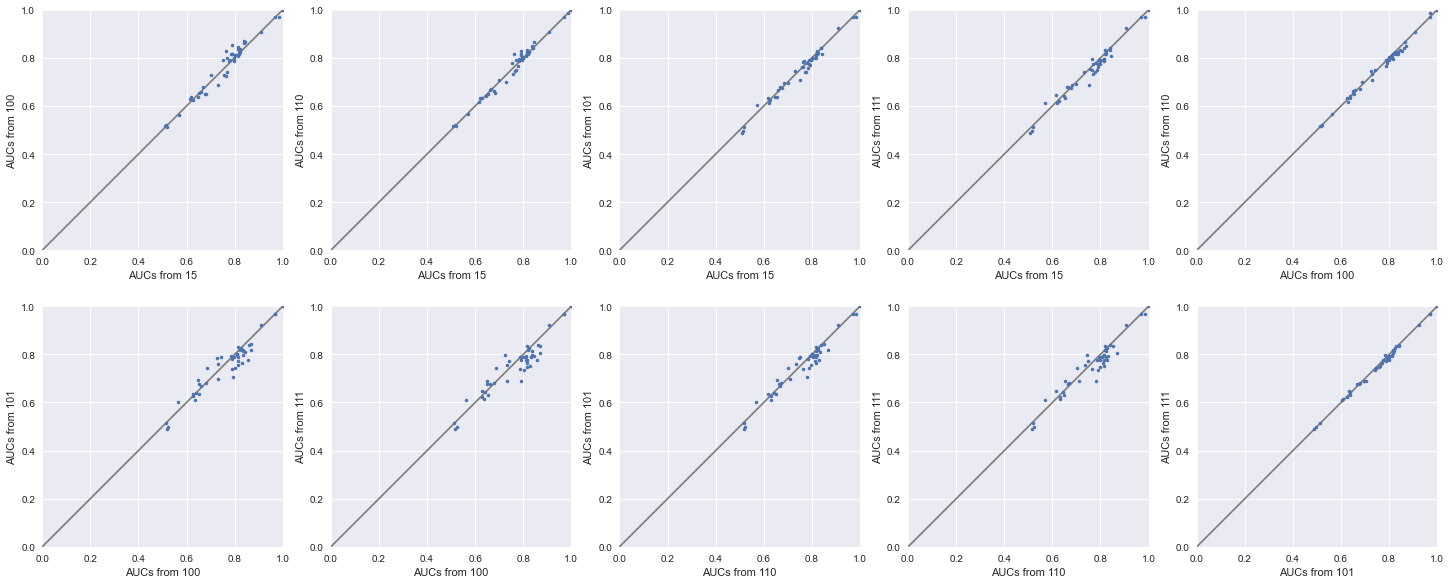

In [10]:
for profiling_name, auc in auc_dict.items():

    display(Markdown(f"### Ligand profiling method: {profiling_name}"))
    pairs = list(itertools.combinations(best_feature_weights, 2))
    n_cols = 5
    n_rows = math.ceil(len(pairs) / n_cols)
    _, axes = plt.subplots(figsize=(n_cols * 5, n_rows * 5), nrows=n_rows, ncols=n_cols)
    axes = axes.reshape(-1)

    for i, pair in enumerate(pairs):

        axes[i].plot([0, 1], [0, 1], "grey")
        axes[i].plot(auc_df[pair[0]], auc_df[pair[1]], ".")
        axes[i].set_box_aspect(1)
        axes[i].set_xlim([0, 1])
        axes[i].set_ylim([0, 1])
        axes[i].set_xlabel(f"AUCs from {pair[0]}")
        axes[i].set_ylabel(f"AUCs from {pair[1]}")

    plt.show()